# Ejercicio 3: Búsqueda de raı́ces

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy import optimize

HOLA ESTO ES UNA PRUEBA

(a) Hallar la función $f_{1}(x)$ que modela el volumen del tanque de agua cuando este se encuentra lleno al pocentaje dado por la expresión $\frac{s}{n·9,5}$. Donde s es la suma del último dı́gito del padrón de los todos los integrantes del grupo y n es la cantidad de personas que forman el grupo.

In [20]:
R = 4.25
s = 10
n = 6
volumen_lleno = 4 / 3 * np.pi * R** 3
porcentaje = s / ( n * 9.5 *100)
def volumen_tanque(altura):
    return np.pi * altura**2 * (3 * R - altura) / 3

def f1(x):
    return volumen_tanque(x) - volumen_lleno * porcentaje

La función $f_{1}(x) = \frac {\pi .x^{2} (3.R−x)}{3} - \frac{s}{n.9,5.100} . \frac{4 \pi . R^{3}}{3} $ es la
función a la que le buscaremos la raiz. 

(b) Hallar la función $f_{2}(x)$ que modela el volumen del tanque de agua cuando este se encuentra
lleno al 100 %.

Cuando el tanque se encuentra al 100% se deberá encontrar la raiz de $f_{2}(x) = \frac {\pi ·x^{2} (3·R−x)}{3} - \frac{4 \pi . R^{3}}{3} $

In [21]:
def f2(x):
    return volumen_tanque(x) - volumen_lleno

(c) Graficar las funciones $f_{1}(x)$ y $f_{2}(x)$ y sus derivadas en el intervalo de interés.

Ambas funciones estan definidas en el intervalo $[0, 2R]$

Sus derivadas $f_{1}'(x)$ y $f_{2}'(x)$ son iguales, ya que difieren en una constante. 
$f_{1}'(x) = f_{2}'(x) = -\pi . x (x - 2R) $

In [22]:
def derivada_f(x):
    return - np.pi * x * (x - 2 * R)

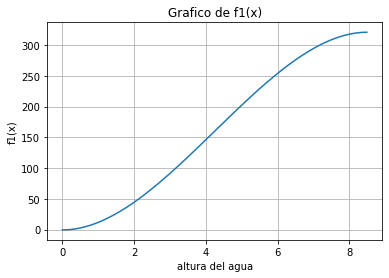

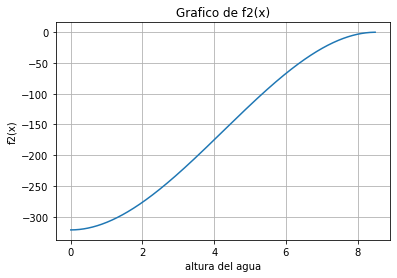

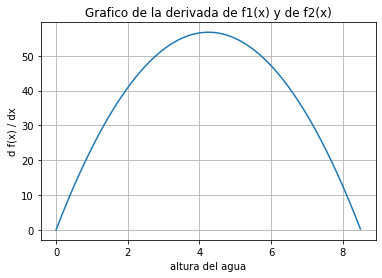

In [23]:
x = np.arange(0, 2 * R, 0.01)


y1 = f1(x)


plt.figure()
plt.plot(x, y1)
plt.title('Grafico de f1(x)')
plt.xlabel('altura del agua')
plt.ylabel('f1(x)')
plt.grid(True)

y2 = f2(x)

plt.figure()
plt.plot(x, y2)
plt.title('Grafico de f2(x)')
plt.xlabel('altura del agua')
plt.ylabel('f2(x)')
plt.grid(True)

derivada = derivada_f(x)

plt.figure()
plt.plot(x, derivada)
plt.title('Grafico de la derivada de f1(x) y de f2(x)')
plt.xlabel('altura del agua')
plt.ylabel('d f(x) / dx')
plt.grid(True)



(d) Halle las raı́ces en el intervalo indicado mediante los métodos vistos en clase (Bisección, Punto
Fijo, Newton-Raphson, Newton-Raphson modificado, Secante).
Use para todos los métodos como criterio de parada las siguientes cotas: $1 · 10^{-5}$ , $1 · 10^{-13}$ , use como semilla un valor tomado con el criterio que considere correcto, justificar.

Tal como se puede observar en los gráficos anteriores, ambas funciones son continuas en el intervalo en el que están definidas. Es decir, en $[0, 2R]$. Para $f_{1}(x)$ se cumple en particular que $f_{1}(a) . f_{1}(b) < 0$, con a = 0 y b = 2R. Por lo tanto, se cumplen las hipótesis necesarias para poder aplicar el método de la bisección. En cuanto a $f_{2}(x)$ , no podremos aplicar el método, ya que la raíz que buscamos es doble. En un entorno de la raíz, la función solo toma valores negativos. Por lo tanto, no existen a,b tales que $f_{2}(a) . f_{2}(b) < 0$.

In [70]:
DECIMALES = 15
PRIMERA_COTA = 1e-5
SEGUNDA_COTA = 1e-13
MSG_MAX_ITERACIONES = "El algoritmo ha excedido la cantidad máxima de iteraciones permitidas."
MAX_ITERACIONES = 100000

A = 0
B = 2 * R

def biseccion(f, a, b, tolerancia, max_iteraciones):
    p = (a + b) / 2 
    n = 1 
    error = abs(a-b)/2
    datos = []
    datos.append((n, p, error))

    while((error > tolerancia and n <= max_iteraciones)):

        if np.sign(f(a)) == np.sign(f(p)):
            a = p
        else:
            b = p

        p_nuevo = (a+b)/2
        error = error/2
        n += 1
        p = p_nuevo
        datos.append((n, p, error))
    
    if( n > max_iteraciones):
            raise Exception(MSG_MAX_ITERACIONES)
            
    return datos


def imprimir_datos(datos):
    print("\n" + 65 * '*')
    print("Iteración", "\t\t", "Raíz", "\t\t\t  ", "Error" "\t\t\t")
    print(65 * '_' + "\n")
    llego_primera_cota = False
    for element in datos:
        print(str(element[0]).ljust(18), "{:.{prec}e}".format(element[1], prec = DECIMALES).ljust(25),"{:{prec}e}".format(element[2], prec = DECIMALES, largo=5))
        if((element[2] < PRIMERA_COTA) and (not llego_primera_cota)):
            print(65 * '_' + "\n")
            print("En la iteración {0} se cumple con la primera cota de error: {1}".format(element[0], PRIMERA_COTA))
            print(65 * '_' + "\n")
            llego_primera_cota = True
    print("\n" + 65 * '*')

In [71]:
    resultados = biseccion(f1, A, B, SEGUNDA_COTA, max_iteraciones = 100)
    imprimir_datos(resultados)


*****************************************************************
Iteración 		 Raíz 			   Error			
_________________________________________________________________

1                  4.250000000000000e+00        4.250000e+00
2                  2.125000000000000e+00        2.125000e+00
3                  1.062500000000000e+00        1.062500e+00
4                  5.312500000000000e-01        5.312500e-01
5                  2.656250000000000e-01        2.656250e-01
6                  1.328125000000000e-01        1.328125e-01
7                  1.992187500000000e-01        6.640625e-02
8                  2.324218750000000e-01        3.320312e-02
9                  2.158203125000000e-01        1.660156e-02
10                 2.075195312500000e-01        8.300781e-03
11                 2.033691406250000e-01        4.150391e-03
12                 2.054443359375000e-01        2.075195e-03
13                 2.064819335937500e-01        1.037598e-03
14                 2.070007324218750e-01

Definimos $g_{1}(x) = f_{1}(x) + x$ y $g_{2}(x) = f_{2}(x) + x$ para poder aplicar el metodo de punto fijo.  

In [51]:
def g1(x):
    return f1(x) + x

def g2(x):
    return f2(x) + x

def der_g1(x):
    return derivada_f(x) + 1

def der_g2(x):
    return derivada_f(x) + 1

A continuación mostramos el gráfico de $g_{1}(x)$ en un entorno del punto fijo que buscamos. 

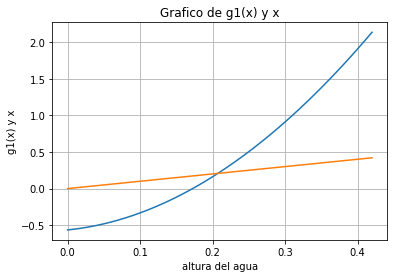

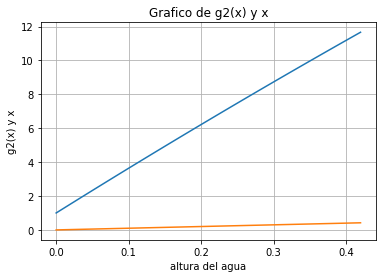

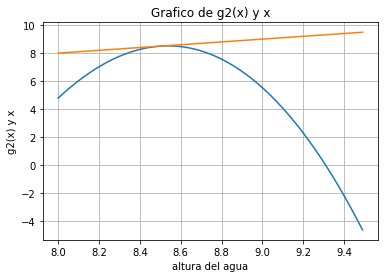

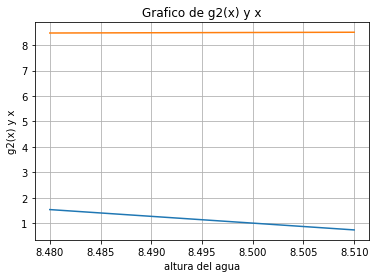

In [52]:
x = np.arange(0, R/10, 0.01)
y1 = g1(x)

plt.figure()
plt.plot(x, y1)
plt.plot(x, x)
plt.title('Grafico de g1(x) y x')
plt.xlabel('altura del agua')
plt.ylabel('g1(x) y x')
plt.grid(True)

der = der_g1(x)

plt.figure()
plt.plot(x, der)
plt.plot(x, x)
plt.title('Grafico de g2(x) y x')
plt.xlabel('altura del agua')
plt.ylabel('g2(x) y x')
plt.grid(True)

x = np.arange(8, 2*R + 1, 0.01)
y1 = g2(x)

plt.figure()
plt.plot(x, y1)
plt.plot(x, x)
plt.title('Grafico de g2(x) y x')
plt.xlabel('altura del agua')
plt.ylabel('g2(x) y x')
plt.grid(True)

x = np.arange(8.48, 8.52 , 0.01)
der = der_g2(x)

plt.figure()
plt.plot(x, der)
plt.plot(x, x)
plt.title('Grafico de g2(x) y x')
plt.xlabel('altura del agua')
plt.ylabel('g2(x) y x')
plt.grid(True)


In [54]:
def punto_fijo(a, b, f, max_iteraciones, tol):
    
    p = (a+b)/2
    error = p
    i = 1
    data = []
    data.append((i, p, error))

    while(error > tol and i < max_iteraciones):

        p_old = p
        p = f(p)
        error = abs(p - p_old)
        i += 1
        data.append((i, p, error))

    return data

En el método de raíces de punto fijo, ambos casos divergen. Si bien a priori no se sabe como será la convergencia del método, si es claro que no existe ningún intervalo $[a, b]$ que contenga a la raíz y en el cuál se cumpla que 
$\forall x \in [a, b] \Rightarrow g_{1}(x) \in [a, b]$. Por lo tanto, no se pueden asegurar las condiciones suficientes para la convergencia del método. 

In [59]:
resultado = []
resultado = punto_fijo(0, 0.3, g1, MAX_ITERACIONES, SEGUNDA_COTA)
imprimir_datos(resultado)

resultado = punto_fijo(8.48, 8.53, g2, MAX_ITERACIONES, SEGUNDA_COTA)
imprimir_datos(resultado)


*****************************************************************
Iteración 		 Raíz 			   Error			
_________________________________________________________________

1                  1.500000000000000e-01        1.500000e-01
2                  -1.172512452257738e-01       2.672512e-01
3                  -4.961367883509430e-01       3.788855e-01
4                  2.354181131002686e+00        2.850318e+00
5                  6.212473732795993e+01        5.977056e+01
6                  -1.994934087590454e+05       1.995555e+05
7                  8.314612757340530e+15        8.314613e+15
8                  -6.019420734250912e+47       6.019421e+47
9                  2.283982214180271e+143      2.283982e+143
10                 -inf                                  inf
11                 nan                                   nan

*****************************************************************

*****************************************************************
Iteración 		 Raíz 			   Erro

696                8.500104911602822e+00        1.473699e-07
697                8.500104764646156e+00        1.469567e-07
698                8.500104618100924e+00        1.465452e-07
699                8.500104471965361e+00        1.461356e-07
700                8.500104326237764e+00        1.457276e-07
701                8.500104180916427e+00        1.453213e-07
702                8.500104035999701e+00        1.449167e-07
703                8.500103891485882e+00        1.445138e-07
704                8.500103747373206e+00        1.441127e-07
705                8.500103603660083e+00        1.437131e-07
706                8.500103460344864e+00        1.433152e-07
707                8.500103317425786e+00        1.429191e-07
708                8.500103174901373e+00        1.425244e-07
709                8.500103032769861e+00        1.421315e-07
710                8.500102891029659e+00        1.417402e-07
711                8.500102749679176e+00        1.413505e-07
712                8.500

1713               8.500043247960097e+00        2.500190e-08
1714               8.500043222987077e+00        2.497302e-08
1715               8.500043198042935e+00        2.494414e-08
1716               8.500043173127555e+00        2.491538e-08
1717               8.500043148240938e+00        2.488662e-08
1718               8.500043123382969e+00        2.485797e-08
1719               8.500043098553650e+00        2.482932e-08
1720               8.500043073752867e+00        2.480078e-08
1721               8.500043048980618e+00        2.477225e-08
1722               8.500043024236906e+00        2.474371e-08
1723               8.500042999521614e+00        2.471529e-08
1724               8.500042974834688e+00        2.468693e-08
1725               8.500042950176127e+00        2.465856e-08
1726               8.500042925545873e+00        2.463025e-08
1727               8.500042900943871e+00        2.460200e-08
1728               8.500042876370006e+00        2.457386e-08
1729               8.500

2841               8.500026184886796e+00        9.160999e-09
2842               8.500026175732163e+00        9.154633e-09
2843               8.500026166584011e+00        9.148152e-09
2844               8.500026157442225e+00        9.141786e-09
2845               8.500026148306805e+00        9.135420e-09
2846               8.500026139177752e+00        9.129053e-09
2847               8.500026130055065e+00        9.122687e-09
2848               8.500026120938802e+00        9.116263e-09
2849               8.500026111828848e+00        9.109954e-09
2850               8.500026102725318e+00        9.103530e-09
2851               8.500026093628097e+00        9.097221e-09
2852               8.500026084537243e+00        9.090854e-09
2853               8.500026075452642e+00        9.084602e-09
2854               8.500026066374406e+00        9.078235e-09
2855               8.500026057302538e+00        9.071869e-09
2856               8.500026048236922e+00        9.065616e-09
2857               8.500

3866               8.500019275415415e+00        4.963226e-09
3867               8.500019270454690e+00        4.960725e-09
3868               8.500019265496579e+00        4.958110e-09
3869               8.500019260540970e+00        4.955609e-09
3870               8.500019255587976e+00        4.952994e-09
3871               8.500019250637482e+00        4.950493e-09
3872               8.500019245689547e+00        4.947935e-09
3873               8.500019240744169e+00        4.945377e-09
3874               8.500019235801293e+00        4.942876e-09
3875               8.500019230860975e+00        4.940318e-09
3876               8.500019225923101e+00        4.937874e-09
3877               8.500019220987841e+00        4.935259e-09
3878               8.500019216055140e+00        4.932701e-09
3879               8.500019211124883e+00        4.930257e-09
3880               8.500019206197184e+00        4.927699e-09
3881               8.500019201272043e+00        4.925141e-09
3882               8.500

4941               8.500015097567601e+00        3.044534e-09
4942               8.500015094524318e+00        3.043283e-09
4943               8.500015091482172e+00        3.042146e-09
4944               8.500015088441277e+00        3.040896e-09
4945               8.500015085401575e+00        3.039702e-09
4946               8.500015082363181e+00        3.038394e-09
4947               8.500015079326037e+00        3.037144e-09
4948               8.500015076290030e+00        3.036007e-09
4949               8.500015073255330e+00        3.034700e-09
4950               8.500015070221824e+00        3.033506e-09
4951               8.500015067189512e+00        3.032312e-09
4952               8.500015064158394e+00        3.031118e-09
4953               8.500015061128526e+00        3.029868e-09
4954               8.500015058099908e+00        3.028617e-09
4955               8.500015055072485e+00        3.027424e-09
4956               8.500015052046312e+00        3.026173e-09
4957               8.500

5999               8.500012443325094e+00        2.067964e-09
6000               8.500012441257812e+00        2.067281e-09
6001               8.500012439191213e+00        2.066599e-09
6002               8.500012437125296e+00        2.065917e-09
6003               8.500012435060061e+00        2.065235e-09
6004               8.500012432995508e+00        2.064553e-09
6005               8.500012430931637e+00        2.063871e-09
6006               8.500012428868448e+00        2.063189e-09
6007               8.500012426805942e+00        2.062507e-09
6008               8.500012424744117e+00        2.061824e-09
6009               8.500012422682975e+00        2.061142e-09
6010               8.500012420622514e+00        2.060460e-09
6011               8.500012418562736e+00        2.059778e-09
6012               8.500012416503640e+00        2.059096e-09
6013               8.500012414445226e+00        2.058414e-09
6014               8.500012412387495e+00        2.057732e-09
6015               8.500

7051               8.500010591843992e+00        1.498279e-09
7052               8.500010590346168e+00        1.497824e-09
7053               8.500010588848685e+00        1.497483e-09
7054               8.500010587351657e+00        1.497028e-09
7055               8.500010585855083e+00        1.496574e-09
7056               8.500010584358964e+00        1.496119e-09
7057               8.500010582863244e+00        1.495721e-09
7058               8.500010581367921e+00        1.495323e-09
7059               8.500010579872995e+00        1.494925e-09
7060               8.500010578378525e+00        1.494470e-09
7061               8.500010576884510e+00        1.494016e-09
7062               8.500010575390892e+00        1.493618e-09
7063               8.500010573897672e+00        1.493220e-09
7064               8.500010572404850e+00        1.492822e-09
7065               8.500010570912483e+00        1.492367e-09
7066               8.500010569420571e+00        1.491912e-09
7067               8.500

8234               8.500009073672803e+00        1.099522e-09
8235               8.500009072573565e+00        1.099238e-09
8236               8.500009071474555e+00        1.099011e-09
8237               8.500009070375885e+00        1.098670e-09
8238               8.500009069277443e+00        1.098442e-09
8239               8.500009068179228e+00        1.098215e-09
8240               8.500009067081354e+00        1.097874e-09
8241               8.500009065983708e+00        1.097646e-09
8242               8.500009064886346e+00        1.097362e-09
8243               8.500009063789268e+00        1.097078e-09
8244               8.500009062692417e+00        1.096851e-09
8245               8.500009061595907e+00        1.096510e-09
8246               8.500009060499625e+00        1.096282e-09
8247               8.500009059403570e+00        1.096055e-09
8248               8.500009058307800e+00        1.095771e-09
8249               8.500009057212313e+00        1.095486e-09
8250               8.500

9222               8.500008103630993e+00        8.769803e-10
9223               8.500008102754240e+00        8.767529e-10
9224               8.500008101877658e+00        8.765824e-10
9225               8.500008101001246e+00        8.764118e-10
9226               8.500008100125061e+00        8.761845e-10
9227               8.500008099249104e+00        8.759571e-10
9228               8.500008098373261e+00        8.758434e-10
9229               8.500008097497645e+00        8.756160e-10
9230               8.500008096622199e+00        8.754455e-10
9231               8.500008095746924e+00        8.752750e-10
9232               8.500008094871877e+00        8.750476e-10
9233               8.500008093997000e+00        8.748771e-10
9234               8.500008093122293e+00        8.747065e-10
9235               8.500008092247814e+00        8.744792e-10
9236               8.500008091373505e+00        8.743086e-10
9237               8.500008090499367e+00        8.741381e-10
9238               8.500

10185              8.500007338917502e+00        7.191829e-10
10186              8.500007338198433e+00        7.190692e-10
10187              8.500007337479534e+00        7.188987e-10
10188              8.500007336760749e+00        7.187850e-10
10189              8.500007336042078e+00        7.186713e-10
10190              8.500007335323520e+00        7.185577e-10
10191              8.500007334605133e+00        7.183871e-10
10192              8.500007333886916e+00        7.182166e-10
10193              8.500007333168814e+00        7.181029e-10
10194              8.500007332450824e+00        7.179892e-10
10195              8.500007331733006e+00        7.178187e-10
10196              8.500007331015301e+00        7.177050e-10
10197              8.500007330297766e+00        7.175345e-10
10198              8.500007329580345e+00        7.174208e-10
10199              8.500007328863095e+00        7.172503e-10
10200              8.500007328146015e+00        7.170797e-10
10201              8.500

11144              8.500006708500340e+00        6.009486e-10
11145              8.500006707899505e+00        6.008349e-10
11146              8.500006707298784e+00        6.007213e-10
11147              8.500006706698176e+00        6.006076e-10
11148              8.500006706097626e+00        6.005507e-10
11149              8.500006705497245e+00        6.003802e-10
11150              8.500006704896922e+00        6.003233e-10
11151              8.500006704296769e+00        6.001528e-10
11152              8.500006703696673e+00        6.000960e-10
11153              8.500006703096748e+00        5.999254e-10
11154              8.500006702496822e+00        5.999254e-10
11155              8.500006701897011e+00        5.998118e-10
11156              8.500006701297313e+00        5.996981e-10
11157              8.500006700697728e+00        5.995844e-10
11158              8.500006700098314e+00        5.994139e-10
11159              8.500006699498957e+00        5.993570e-10
11160              8.500

12085              8.500006187016883e+00        5.111360e-10
12086              8.500006186505804e+00        5.110792e-10
12087              8.500006185994781e+00        5.110223e-10
12088              8.500006185483873e+00        5.109086e-10
12089              8.500006184973078e+00        5.107950e-10
12090              8.500006184462396e+00        5.106813e-10
12091              8.500006183951772e+00        5.106244e-10
12092              8.500006183441204e+00        5.105676e-10
12093              8.500006182930750e+00        5.104539e-10
12094              8.500006182420353e+00        5.103971e-10
12095              8.500006181910070e+00        5.102834e-10
12096              8.500006181399844e+00        5.102265e-10
12097              8.500006180889731e+00        5.101128e-10
12098              8.500006180379732e+00        5.099992e-10
12099              8.500006179869732e+00        5.099992e-10
12100              8.500006179359904e+00        5.098286e-10
12101              8.500

13153              8.500005685424870e+00        4.316121e-10
13154              8.500005684993315e+00        4.315552e-10
13155              8.500005684561874e+00        4.314415e-10
13156              8.500005684130432e+00        4.314415e-10
13157              8.500005683699104e+00        4.313279e-10
13158              8.500005683267776e+00        4.313279e-10
13159              8.500005682836562e+00        4.312142e-10
13160              8.500005682405462e+00        4.311005e-10
13161              8.500005681974361e+00        4.311005e-10
13162              8.500005681543318e+00        4.310436e-10
13163              8.500005681112331e+00        4.309868e-10
13164              8.500005680681458e+00        4.308731e-10
13165              8.500005680250641e+00        4.308163e-10
13166              8.500005679819882e+00        4.307594e-10
13167              8.500005679389179e+00        4.307026e-10
13168              8.500005678958534e+00        4.306457e-10
13169              8.500

14189              8.500005270916066e+00        3.709033e-10
14190              8.500005270545163e+00        3.709033e-10
14191              8.500005270174317e+00        3.708465e-10
14192              8.500005269803527e+00        3.707896e-10
14193              8.500005269432794e+00        3.707328e-10
14194              8.500005269062061e+00        3.707328e-10
14195              8.500005268691442e+00        3.706191e-10
14196              8.500005268320880e+00        3.705622e-10
14197              8.500005267950318e+00        3.705622e-10
14198              8.500005267579812e+00        3.705054e-10
14199              8.500005267209421e+00        3.703917e-10
14200              8.500005266839086e+00        3.703349e-10
14201              8.500005266468751e+00        3.703349e-10
14202              8.500005266098473e+00        3.702780e-10
14203              8.500005265728252e+00        3.702212e-10
14204              8.500005265358030e+00        3.702212e-10
14205              8.500

15209              8.500004917909738e+00        3.229843e-10
15210              8.500004917586867e+00        3.228706e-10
15211              8.500004917264054e+00        3.228138e-10
15212              8.500004916941297e+00        3.227569e-10
15213              8.500004916618540e+00        3.227569e-10
15214              8.500004916295783e+00        3.227569e-10
15215              8.500004915973083e+00        3.227001e-10
15216              8.500004915650440e+00        3.226432e-10
15217              8.500004915327853e+00        3.225864e-10
15218              8.500004915005267e+00        3.225864e-10
15219              8.500004914682737e+00        3.225296e-10
15220              8.500004914360321e+00        3.224159e-10
15221              8.500004914037905e+00        3.224159e-10
15222              8.500004913715490e+00        3.224159e-10
15223              8.500004913393131e+00        3.223590e-10
15224              8.500004913070828e+00        3.223022e-10
15225              8.500

16210              8.500004614619119e+00        2.843308e-10
16211              8.500004614334845e+00        2.842739e-10
16212              8.500004614050628e+00        2.842171e-10
16213              8.500004613766411e+00        2.842171e-10
16214              8.500004613482194e+00        2.842171e-10
16215              8.500004613198090e+00        2.841034e-10
16216              8.500004612913987e+00        2.841034e-10
16217              8.500004612629940e+00        2.840466e-10
16218              8.500004612345837e+00        2.841034e-10
16219              8.500004612061790e+00        2.840466e-10
16220              8.500004611777801e+00        2.839897e-10
16221              8.500004611493925e+00        2.838760e-10
16222              8.500004611210048e+00        2.838760e-10
16223              8.500004610926229e+00        2.838192e-10
16224              8.500004610642353e+00        2.838760e-10
16225              8.500004610358534e+00        2.838192e-10
16226              8.500

17251              8.500004336502574e+00        2.510774e-10
17252              8.500004336251553e+00        2.510205e-10
17253              8.500004336000533e+00        2.510205e-10
17254              8.500004335749512e+00        2.510205e-10
17255              8.500004335498549e+00        2.509637e-10
17256              8.500004335247642e+00        2.509069e-10
17257              8.500004334996792e+00        2.508500e-10
17258              8.500004334745942e+00        2.508500e-10
17259              8.500004334495035e+00        2.509069e-10
17260              8.500004334244242e+00        2.507932e-10
17261              8.500004333993449e+00        2.507932e-10
17262              8.500004333742712e+00        2.507363e-10
17263              8.500004333491976e+00        2.507363e-10
17264              8.500004333241296e+00        2.506795e-10
17265              8.500004332990674e+00        2.506226e-10
17266              8.500004332739994e+00        2.506795e-10
17267              8.500

18184              8.500004114272034e+00        2.259526e-10
18185              8.500004114046025e+00        2.260094e-10
18186              8.500004113820072e+00        2.259526e-10
18187              8.500004113594176e+00        2.258957e-10
18188              8.500004113368281e+00        2.258957e-10
18189              8.500004113142442e+00        2.258389e-10
18190              8.500004112916603e+00        2.258389e-10
18191              8.500004112690821e+00        2.257821e-10
18192              8.500004112464982e+00        2.258389e-10
18193              8.500004112239200e+00        2.257821e-10
18194              8.500004112013475e+00        2.257252e-10
18195              8.500004111787749e+00        2.257252e-10
18196              8.500004111562081e+00        2.256684e-10
18197              8.500004111336413e+00        2.256684e-10
18198              8.500004111110744e+00        2.256684e-10
18199              8.500004110885133e+00        2.256115e-10
18200              8.500

19202              8.500003896408774e+00        2.027036e-10
19203              8.500003896206128e+00        2.026468e-10
19204              8.500003896003424e+00        2.027036e-10
19205              8.500003895800777e+00        2.026468e-10
19206              8.500003895598130e+00        2.026468e-10
19207              8.500003895395540e+00        2.025899e-10
19208              8.500003895192950e+00        2.025899e-10
19209              8.500003894990417e+00        2.025331e-10
19210              8.500003894787941e+00        2.024763e-10
19211              8.500003894585465e+00        2.024763e-10
19212              8.500003894382989e+00        2.024763e-10
19213              8.500003894180512e+00        2.024763e-10
19214              8.500003893978036e+00        2.024763e-10
19215              8.500003893775617e+00        2.024194e-10
19216              8.500003893573254e+00        2.023626e-10
19217              8.500003893370891e+00        2.023626e-10
19218              8.500

20214              8.500003701560733e+00        1.829221e-10
20215              8.500003701377810e+00        1.829221e-10
20216              8.500003701194945e+00        1.828653e-10
20217              8.500003701012023e+00        1.829221e-10
20218              8.500003700829215e+00        1.828084e-10
20219              8.500003700646406e+00        1.828084e-10
20220              8.500003700463598e+00        1.828084e-10
20221              8.500003700280846e+00        1.827516e-10
20222              8.500003700098095e+00        1.827516e-10
20223              8.500003699915400e+00        1.826947e-10
20224              8.500003699732705e+00        1.826947e-10
20225              8.500003699549953e+00        1.827516e-10
20226              8.500003699367259e+00        1.826947e-10
20227              8.500003699184564e+00        1.826947e-10
20228              8.500003699001869e+00        1.826947e-10
20229              8.500003698819231e+00        1.826379e-10
20230              8.500

21255              8.500003520471243e+00        1.654712e-10
21256              8.500003520305828e+00        1.654143e-10
21257              8.500003520140414e+00        1.654143e-10
21258              8.500003519974999e+00        1.654143e-10
21259              8.500003519809585e+00        1.654143e-10
21260              8.500003519644171e+00        1.654143e-10
21261              8.500003519478813e+00        1.653575e-10
21262              8.500003519313513e+00        1.653007e-10
21263              8.500003519148212e+00        1.653007e-10
21264              8.500003518982911e+00        1.653007e-10
21265              8.500003518817611e+00        1.653007e-10
21266              8.500003518652310e+00        1.653007e-10
21267              8.500003518487009e+00        1.653007e-10
21268              8.500003518321765e+00        1.652438e-10
21269              8.500003518156522e+00        1.652438e-10
21270              8.500003517991278e+00        1.652438e-10
21271              8.500

22226              8.500003366838374e+00        1.513172e-10
22227              8.500003366687057e+00        1.513172e-10
22228              8.500003366535797e+00        1.512603e-10
22229              8.500003366384536e+00        1.512603e-10
22230              8.500003366233333e+00        1.512035e-10
22231              8.500003366082129e+00        1.512035e-10
22232              8.500003365930926e+00        1.512035e-10
22233              8.500003365779666e+00        1.512603e-10
22234              8.500003365628462e+00        1.512035e-10
22235              8.500003365477259e+00        1.512035e-10
22236              8.500003365326055e+00        1.512035e-10
22237              8.500003365174852e+00        1.512035e-10
22238              8.500003365023648e+00        1.512035e-10
22239              8.500003364872445e+00        1.512035e-10
22240              8.500003364721355e+00        1.510898e-10
22241              8.500003364570265e+00        1.510898e-10
22242              8.500

23216              8.500003223419530e+00        1.387548e-10
23217              8.500003223280832e+00        1.386979e-10
23218              8.500003223142134e+00        1.386979e-10
23219              8.500003223003436e+00        1.386979e-10
23220              8.500003222864738e+00        1.386979e-10
23221              8.500003222726097e+00        1.386411e-10
23222              8.500003222587456e+00        1.386411e-10
23223              8.500003222448814e+00        1.386411e-10
23224              8.500003222310230e+00        1.385843e-10
23225              8.500003222171646e+00        1.385843e-10
23226              8.500003222033062e+00        1.385843e-10
23227              8.500003221894477e+00        1.385843e-10
23228              8.500003221755893e+00        1.385843e-10
23229              8.500003221617366e+00        1.385274e-10
23230              8.500003221478838e+00        1.385274e-10
23231              8.500003221340368e+00        1.384706e-10
23232              8.500

24200              8.500003092488900e+00        1.276703e-10
24201              8.500003092361229e+00        1.276703e-10
24202              8.500003092233616e+00        1.276135e-10
24203              8.500003092106002e+00        1.276135e-10
24204              8.500003091978389e+00        1.276135e-10
24205              8.500003091850775e+00        1.276135e-10
24206              8.500003091723162e+00        1.276135e-10
24207              8.500003091595605e+00        1.275566e-10
24208              8.500003091468049e+00        1.275566e-10
24209              8.500003091340492e+00        1.275566e-10
24210              8.500003091212935e+00        1.275566e-10
24211              8.500003091085436e+00        1.274998e-10
24212              8.500003090957936e+00        1.274998e-10
24213              8.500003090830493e+00        1.274429e-10
24214              8.500003090702936e+00        1.275566e-10
24215              8.500003090575436e+00        1.274998e-10
24216              8.500

25258              8.500002963086619e+00        1.172111e-10
25259              8.500002962969408e+00        1.172111e-10
25260              8.500002962852196e+00        1.172111e-10
25261              8.500002962734985e+00        1.172111e-10
25262              8.500002962617831e+00        1.171543e-10
25263              8.500002962500734e+00        1.170974e-10
25264              8.500002962383636e+00        1.170974e-10
25265              8.500002962266539e+00        1.170974e-10
25266              8.500002962149441e+00        1.170974e-10
25267              8.500002962032344e+00        1.170974e-10
25268              8.500002961915246e+00        1.170974e-10
25269              8.500002961798206e+00        1.170406e-10
25270              8.500002961681108e+00        1.170974e-10
25271              8.500002961564011e+00        1.170974e-10
25272              8.500002961446913e+00        1.170974e-10
25273              8.500002961329816e+00        1.170974e-10
25274              8.500

26285              8.500002847431748e+00        1.082299e-10
26286              8.500002847323518e+00        1.082299e-10
26287              8.500002847215345e+00        1.081730e-10
26288              8.500002847107172e+00        1.081730e-10
26289              8.500002846998999e+00        1.081730e-10
26290              8.500002846890826e+00        1.081730e-10
26291              8.500002846782710e+00        1.081162e-10
26292              8.500002846674594e+00        1.081162e-10
26293              8.500002846566421e+00        1.081730e-10
26294              8.500002846458248e+00        1.081730e-10
26295              8.500002846350075e+00        1.081730e-10
26296              8.500002846241902e+00        1.081730e-10
26297              8.500002846133786e+00        1.081162e-10
26298              8.500002846025669e+00        1.081162e-10
26299              8.500002845917553e+00        1.081162e-10
26300              8.500002845809437e+00        1.081162e-10
26301              8.500

27221              8.500002749622073e+00        1.009539e-10
27222              8.500002749521119e+00        1.009539e-10
27223              8.500002749420222e+00        1.008971e-10
27224              8.500002749319325e+00        1.008971e-10
27225              8.500002749218428e+00        1.008971e-10
27226              8.500002749117588e+00        1.008402e-10
27227              8.500002749016691e+00        1.008971e-10
27228              8.500002748915851e+00        1.008402e-10
27229              8.500002748815010e+00        1.008402e-10
27230              8.500002748714170e+00        1.008402e-10
27231              8.500002748613330e+00        1.008402e-10
27232              8.500002748512490e+00        1.008402e-10
27233              8.500002748411649e+00        1.008402e-10
27234              8.500002748310866e+00        1.007834e-10
27235              8.500002748210083e+00        1.007834e-10
27236              8.500002748109356e+00        1.007265e-10
27237              8.500

28192              8.500002655014502e+00        9.407586e-11
28193              8.500002654920369e+00        9.413270e-11
28194              8.500002654826293e+00        9.407586e-11
28195              8.500002654732217e+00        9.407586e-11
28196              8.500002654638141e+00        9.407586e-11
28197              8.500002654544122e+00        9.401901e-11
28198              8.500002654450046e+00        9.407586e-11
28199              8.500002654356027e+00        9.401901e-11
28200              8.500002654262008e+00        9.401901e-11
28201              8.500002654167989e+00        9.401901e-11
28202              8.500002654073970e+00        9.401901e-11
28203              8.500002653979951e+00        9.401901e-11
28204              8.500002653885932e+00        9.401901e-11
28205              8.500002653791913e+00        9.401901e-11
28206              8.500002653697951e+00        9.396217e-11
28207              8.500002653603989e+00        9.396217e-11
28208              8.500

29215              8.500002562139517e+00        8.765255e-11
29216              8.500002562051865e+00        8.765255e-11
29217              8.500002561964269e+00        8.759571e-11
29218              8.500002561876673e+00        8.759571e-11
29219              8.500002561789078e+00        8.759571e-11
29220              8.500002561701482e+00        8.759571e-11
29221              8.500002561613886e+00        8.759571e-11
29222              8.500002561526347e+00        8.753887e-11
29223              8.500002561438809e+00        8.753887e-11
29224              8.500002561351270e+00        8.753887e-11
29225              8.500002561263731e+00        8.753887e-11
29226              8.500002561176192e+00        8.753887e-11
29227              8.500002561088653e+00        8.753887e-11
29228              8.500002561001114e+00        8.753887e-11
29229              8.500002560913575e+00        8.753887e-11
29230              8.500002560826037e+00        8.753887e-11
29231              8.500

30182              8.500002480134018e+00        8.208190e-11
30183              8.500002480051936e+00        8.208190e-11
30184              8.500002479969854e+00        8.208190e-11
30185              8.500002479887772e+00        8.208190e-11
30186              8.500002479805691e+00        8.208190e-11
30187              8.500002479723609e+00        8.208190e-11
30188              8.500002479641584e+00        8.202505e-11
30189              8.500002479559559e+00        8.202505e-11
30190              8.500002479477534e+00        8.202505e-11
30191              8.500002479395508e+00        8.202505e-11
30192              8.500002479313483e+00        8.202505e-11
30193              8.500002479231515e+00        8.196821e-11
30194              8.500002479149547e+00        8.196821e-11
30195              8.500002479067579e+00        8.196821e-11
30196              8.500002478985611e+00        8.196821e-11
30197              8.500002478903586e+00        8.202505e-11
30198              8.500

31193              8.500002399832059e+00        7.685230e-11
31194              8.500002399755207e+00        7.685230e-11
31195              8.500002399678355e+00        7.685230e-11
31196              8.500002399601502e+00        7.685230e-11
31197              8.500002399524650e+00        7.685230e-11
31198              8.500002399447798e+00        7.685230e-11
31199              8.500002399370945e+00        7.685230e-11
31200              8.500002399294093e+00        7.685230e-11
31201              8.500002399217241e+00        7.685230e-11
31202              8.500002399140445e+00        7.679546e-11
31203              8.500002399063650e+00        7.679546e-11
31204              8.500002398986855e+00        7.679546e-11
31205              8.500002398910059e+00        7.679546e-11
31206              8.500002398833264e+00        7.679546e-11
31207              8.500002398756468e+00        7.679546e-11
31208              8.500002398679673e+00        7.679546e-11
31209              8.500

32243              8.500002321759386e+00        7.190692e-11
32244              8.500002321687479e+00        7.190692e-11
32245              8.500002321615572e+00        7.190692e-11
32246              8.500002321543665e+00        7.190692e-11
32247              8.500002321471758e+00        7.190692e-11
32248              8.500002321399794e+00        7.196377e-11
32249              8.500002321327830e+00        7.196377e-11
32250              8.500002321255867e+00        7.196377e-11
32251              8.500002321183960e+00        7.190692e-11
32252              8.500002321112053e+00        7.190692e-11
32253              8.500002321040146e+00        7.190692e-11
32254              8.500002320968239e+00        7.190692e-11
32255              8.500002320896332e+00        7.190692e-11
32256              8.500002320824425e+00        7.190692e-11
32257              8.500002320752518e+00        7.190692e-11
32258              8.500002320680611e+00        7.190692e-11
32259              8.500

33232              8.500002252732376e+00        6.775736e-11
33233              8.500002252664618e+00        6.775736e-11
33234              8.500002252596861e+00        6.775736e-11
33235              8.500002252529104e+00        6.775736e-11
33236              8.500002252461403e+00        6.770051e-11
33237              8.500002252393703e+00        6.770051e-11
33238              8.500002252325945e+00        6.775736e-11
33239              8.500002252258245e+00        6.770051e-11
33240              8.500002252190544e+00        6.770051e-11
33241              8.500002252122844e+00        6.770051e-11
33242              8.500002252055143e+00        6.770051e-11
33243              8.500002251987443e+00        6.770051e-11
33244              8.500002251919799e+00        6.764367e-11
33245              8.500002251852155e+00        6.764367e-11
33246              8.500002251784512e+00        6.764367e-11
33247              8.500002251716868e+00        6.764367e-11
33248              8.500

34118              8.500002194291714e+00        6.423306e-11
34119              8.500002194227481e+00        6.423306e-11
34120              8.500002194163248e+00        6.423306e-11
34121              8.500002194099014e+00        6.423306e-11
34122              8.500002194034781e+00        6.423306e-11
34123              8.500002193970548e+00        6.423306e-11
34124              8.500002193906315e+00        6.423306e-11
34125              8.500002193842082e+00        6.423306e-11
34126              8.500002193777849e+00        6.423306e-11
34127              8.500002193713616e+00        6.423306e-11
34128              8.500002193649440e+00        6.417622e-11
34129              8.500002193585264e+00        6.417622e-11
34130              8.500002193521031e+00        6.423306e-11
34131              8.500002193456798e+00        6.423306e-11
34132              8.500002193392564e+00        6.423306e-11
34133              8.500002193328331e+00        6.423306e-11
34134              8.500

34798              8.500002151456389e+00        6.178880e-11
34799              8.500002151394600e+00        6.178880e-11
34800              8.500002151332811e+00        6.178880e-11
34801              8.500002151271079e+00        6.173195e-11
34802              8.500002151209348e+00        6.173195e-11
34803              8.500002151147616e+00        6.173195e-11
34804              8.500002151085884e+00        6.173195e-11
34805              8.500002151024152e+00        6.173195e-11
34806              8.500002150962420e+00        6.173195e-11
34807              8.500002150900688e+00        6.173195e-11
34808              8.500002150838956e+00        6.173195e-11
34809              8.500002150777224e+00        6.173195e-11
34810              8.500002150715492e+00        6.173195e-11
34811              8.500002150653760e+00        6.173195e-11
34812              8.500002150592085e+00        6.167511e-11
34813              8.500002150530353e+00        6.173195e-11
34814              8.500

35465              8.500002111035545e+00        5.945822e-11
35466              8.500002110976087e+00        5.945822e-11
35467              8.500002110916629e+00        5.945822e-11
35468              8.500002110857171e+00        5.945822e-11
35469              8.500002110797713e+00        5.945822e-11
35470              8.500002110738254e+00        5.945822e-11
35471              8.500002110678853e+00        5.940137e-11
35472              8.500002110619395e+00        5.945822e-11
35473              8.500002110559937e+00        5.945822e-11
35474              8.500002110500535e+00        5.940137e-11
35475              8.500002110441134e+00        5.940137e-11
35476              8.500002110381732e+00        5.940137e-11
35477              8.500002110322331e+00        5.940137e-11
35478              8.500002110262987e+00        5.934453e-11
35479              8.500002110203642e+00        5.934453e-11
35480              8.500002110144298e+00        5.934453e-11
35481              8.500

35972              8.500002081313259e+00        5.780976e-11
35973              8.500002081255506e+00        5.775291e-11
35974              8.500002081197753e+00        5.775291e-11
35975              8.500002081139943e+00        5.780976e-11
35976              8.500002081082133e+00        5.780976e-11
35977              8.500002081024324e+00        5.780976e-11
35978              8.500002080966514e+00        5.780976e-11
35979              8.500002080908704e+00        5.780976e-11
35980              8.500002080850951e+00        5.775291e-11
35981              8.500002080793198e+00        5.775291e-11
35982              8.500002080735445e+00        5.775291e-11
35983              8.500002080677692e+00        5.775291e-11
35984              8.500002080619939e+00        5.775291e-11
35985              8.500002080562187e+00        5.775291e-11
35986              8.500002080504434e+00        5.775291e-11
35987              8.500002080446681e+00        5.775291e-11
35988              8.500

36761              8.500002036689185e+00        5.536549e-11
36762              8.500002036633820e+00        5.536549e-11
36763              8.500002036578454e+00        5.536549e-11
36764              8.500002036523089e+00        5.536549e-11
36765              8.500002036467723e+00        5.536549e-11
36766              8.500002036412358e+00        5.536549e-11
36767              8.500002036356992e+00        5.536549e-11
36768              8.500002036301627e+00        5.536549e-11
36769              8.500002036246318e+00        5.530865e-11
36770              8.500002036191010e+00        5.530865e-11
36771              8.500002036135701e+00        5.530865e-11
36772              8.500002036080392e+00        5.530865e-11
36773              8.500002036025084e+00        5.530865e-11
36774              8.500002035969775e+00        5.530865e-11
36775              8.500002035914466e+00        5.530865e-11
36776              8.500002035859215e+00        5.525180e-11
36777              8.500

37785              8.500001981552433e+00        5.235279e-11
37786              8.500001981500080e+00        5.235279e-11
37787              8.500001981447728e+00        5.235279e-11
37788              8.500001981395375e+00        5.235279e-11
37789              8.500001981343079e+00        5.229595e-11
37790              8.500001981290669e+00        5.240963e-11
37791              8.500001981238260e+00        5.240963e-11
37792              8.500001981185850e+00        5.240963e-11
37793              8.500001981133440e+00        5.240963e-11
37794              8.500001981081031e+00        5.240963e-11
37795              8.500001981028621e+00        5.240963e-11
37796              8.500001980976212e+00        5.240963e-11
37797              8.500001980923859e+00        5.235279e-11
37798              8.500001980871506e+00        5.235279e-11
37799              8.500001980819153e+00        5.235279e-11
37800              8.500001980766800e+00        5.235279e-11
37801              8.500

38792              8.500001930168484e+00        4.973799e-11
38793              8.500001930118803e+00        4.968115e-11
38794              8.500001930069065e+00        4.973799e-11
38795              8.500001930019383e+00        4.968115e-11
38796              8.500001929969645e+00        4.973799e-11
38797              8.500001929919964e+00        4.968115e-11
38798              8.500001929870283e+00        4.968115e-11
38799              8.500001929820602e+00        4.968115e-11
38800              8.500001929770921e+00        4.968115e-11
38801              8.500001929721240e+00        4.968115e-11
38802              8.500001929671559e+00        4.968115e-11
38803              8.500001929621877e+00        4.968115e-11
38804              8.500001929572196e+00        4.968115e-11
38805              8.500001929522515e+00        4.968115e-11
38806              8.500001929472834e+00        4.968115e-11
38807              8.500001929423153e+00        4.968115e-11
38808              8.500

39748              8.500001883795623e+00        4.735057e-11
39749              8.500001883748272e+00        4.735057e-11
39750              8.500001883700978e+00        4.729372e-11
39751              8.500001883653628e+00        4.735057e-11
39752              8.500001883606277e+00        4.735057e-11
39753              8.500001883558983e+00        4.729372e-11
39754              8.500001883511690e+00        4.729372e-11
39755              8.500001883464339e+00        4.735057e-11
39756              8.500001883417045e+00        4.729372e-11
39757              8.500001883369752e+00        4.729372e-11
39758              8.500001883322458e+00        4.729372e-11
39759              8.500001883275164e+00        4.729372e-11
39760              8.500001883227871e+00        4.729372e-11
39761              8.500001883180577e+00        4.729372e-11
39762              8.500001883133283e+00        4.729372e-11
39763              8.500001883085989e+00        4.729372e-11
39764              8.500

40809              8.500001834873391e+00        4.490630e-11
40810              8.500001834828485e+00        4.490630e-11
40811              8.500001834783578e+00        4.490630e-11
40812              8.500001834738672e+00        4.490630e-11
40813              8.500001834693766e+00        4.490630e-11
40814              8.500001834648860e+00        4.490630e-11
40815              8.500001834603953e+00        4.490630e-11
40816              8.500001834559047e+00        4.490630e-11
40817              8.500001834514141e+00        4.490630e-11
40818              8.500001834469234e+00        4.490630e-11
40819              8.500001834424328e+00        4.490630e-11
40820              8.500001834379422e+00        4.490630e-11
40821              8.500001834334515e+00        4.490630e-11
40822              8.500001834289609e+00        4.490630e-11
40823              8.500001834244703e+00        4.490630e-11
40824              8.500001834199853e+00        4.484946e-11
40825              8.500

41815              8.500001790779383e+00        4.280309e-11
41816              8.500001790736636e+00        4.274625e-11
41817              8.500001790693890e+00        4.274625e-11
41818              8.500001790651144e+00        4.274625e-11
41819              8.500001790608398e+00        4.274625e-11
41820              8.500001790565651e+00        4.274625e-11
41821              8.500001790522905e+00        4.274625e-11
41822              8.500001790480159e+00        4.274625e-11
41823              8.500001790437413e+00        4.274625e-11
41824              8.500001790394666e+00        4.274625e-11
41825              8.500001790351920e+00        4.274625e-11
41826              8.500001790309174e+00        4.274625e-11
41827              8.500001790266428e+00        4.274625e-11
41828              8.500001790223681e+00        4.274625e-11
41829              8.500001790180935e+00        4.274625e-11
41830              8.500001790138189e+00        4.274625e-11
41831              8.500

42715              8.500001753092253e+00        4.098410e-11
42716              8.500001753051269e+00        4.098410e-11
42717              8.500001753010284e+00        4.098410e-11
42718              8.500001752969244e+00        4.104095e-11
42719              8.500001752928203e+00        4.104095e-11
42720              8.500001752887162e+00        4.104095e-11
42721              8.500001752846121e+00        4.104095e-11
42722              8.500001752805137e+00        4.098410e-11
42723              8.500001752764152e+00        4.098410e-11
42724              8.500001752723168e+00        4.098410e-11
42725              8.500001752682127e+00        4.104095e-11
42726              8.500001752641143e+00        4.098410e-11
42727              8.500001752600159e+00        4.098410e-11
42728              8.500001752559175e+00        4.098410e-11
42729              8.500001752518191e+00        4.098410e-11
42730              8.500001752477207e+00        4.098410e-11
42731              8.500

43296              8.500001729594036e+00        3.990408e-11
43297              8.500001729554132e+00        3.990408e-11
43298              8.500001729514228e+00        3.990408e-11
43299              8.500001729474324e+00        3.990408e-11
43300              8.500001729434420e+00        3.990408e-11
43301              8.500001729394516e+00        3.990408e-11
43302              8.500001729354668e+00        3.984724e-11
43303              8.500001729314764e+00        3.990408e-11
43304              8.500001729274917e+00        3.984724e-11
43305              8.500001729235070e+00        3.984724e-11
43306              8.500001729195223e+00        3.984724e-11
43307              8.500001729155318e+00        3.990408e-11
43308              8.500001729115471e+00        3.984724e-11
43309              8.500001729075624e+00        3.984724e-11
43310              8.500001729035720e+00        3.990408e-11
43311              8.500001728995873e+00        3.984724e-11
43312              8.500

43827              8.500001708662982e+00        3.893774e-11
43828              8.500001708624101e+00        3.888090e-11
43829              8.500001708585220e+00        3.888090e-11
43830              8.500001708546339e+00        3.888090e-11
43831              8.500001708507458e+00        3.888090e-11
43832              8.500001708468520e+00        3.893774e-11
43833              8.500001708429640e+00        3.888090e-11
43834              8.500001708390759e+00        3.888090e-11
43835              8.500001708351878e+00        3.888090e-11
43836              8.500001708312997e+00        3.888090e-11
43837              8.500001708274116e+00        3.888090e-11
43838              8.500001708235235e+00        3.888090e-11
43839              8.500001708196354e+00        3.888090e-11
43840              8.500001708157473e+00        3.888090e-11
43841              8.500001708118592e+00        3.888090e-11
43842              8.500001708079711e+00        3.888090e-11
43843              8.500

44634              8.500001677807010e+00        3.757350e-11
44635              8.500001677769436e+00        3.757350e-11
44636              8.500001677731920e+00        3.751666e-11
44637              8.500001677694346e+00        3.757350e-11
44638              8.500001677656773e+00        3.757350e-11
44639              8.500001677619199e+00        3.757350e-11
44640              8.500001677581682e+00        3.751666e-11
44641              8.500001677544166e+00        3.751666e-11
44642              8.500001677506592e+00        3.757350e-11
44643              8.500001677469076e+00        3.751666e-11
44644              8.500001677431559e+00        3.751666e-11
44645              8.500001677393985e+00        3.757350e-11
44646              8.500001677356469e+00        3.751666e-11
44647              8.500001677318952e+00        3.751666e-11
44648              8.500001677281436e+00        3.751666e-11
44649              8.500001677243919e+00        3.751666e-11
44650              8.500

45669              8.500001639829637e+00        3.586820e-11
45670              8.500001639793712e+00        3.592504e-11
45671              8.500001639757787e+00        3.592504e-11
45672              8.500001639721919e+00        3.586820e-11
45673              8.500001639685994e+00        3.592504e-11
45674              8.500001639650126e+00        3.586820e-11
45675              8.500001639614258e+00        3.586820e-11
45676              8.500001639578390e+00        3.586820e-11
45677              8.500001639542464e+00        3.592504e-11
45678              8.500001639506596e+00        3.586820e-11
45679              8.500001639470728e+00        3.586820e-11
45680              8.500001639434860e+00        3.586820e-11
45681              8.500001639398992e+00        3.586820e-11
45682              8.500001639363123e+00        3.586820e-11
45683              8.500001639327255e+00        3.586820e-11
45684              8.500001639291387e+00        3.586820e-11
45685              8.500

46585              8.500001607624487e+00        3.444711e-11
46586              8.500001607590040e+00        3.444711e-11
46587              8.500001607555536e+00        3.450396e-11
46588              8.500001607521089e+00        3.444711e-11
46589              8.500001607486642e+00        3.444711e-11
46590              8.500001607452194e+00        3.444711e-11
46591              8.500001607417747e+00        3.444711e-11
46592              8.500001607383300e+00        3.444711e-11
46593              8.500001607348853e+00        3.444711e-11
46594              8.500001607314406e+00        3.444711e-11
46595              8.500001607279959e+00        3.444711e-11
46596              8.500001607245512e+00        3.444711e-11
46597              8.500001607211065e+00        3.444711e-11
46598              8.500001607176618e+00        3.444711e-11
46599              8.500001607142170e+00        3.444711e-11
46600              8.500001607107723e+00        3.444711e-11
46601              8.500

47595              8.500001573553451e+00        3.302603e-11
47596              8.500001573520425e+00        3.302603e-11
47597              8.500001573487399e+00        3.302603e-11
47598              8.500001573454373e+00        3.302603e-11
47599              8.500001573421347e+00        3.302603e-11
47600              8.500001573388321e+00        3.302603e-11
47601              8.500001573355295e+00        3.302603e-11
47602              8.500001573322212e+00        3.308287e-11
47603              8.500001573289186e+00        3.302603e-11
47604              8.500001573256160e+00        3.302603e-11
47605              8.500001573223134e+00        3.302603e-11
47606              8.500001573190108e+00        3.302603e-11
47607              8.500001573157082e+00        3.302603e-11
47608              8.500001573124056e+00        3.302603e-11
47609              8.500001573091087e+00        3.296918e-11
47610              8.500001573058061e+00        3.302603e-11
47611              8.500

48448              8.500001545883837e+00        3.188916e-11
48449              8.500001545851948e+00        3.188916e-11
48450              8.500001545820059e+00        3.188916e-11
48451              8.500001545788169e+00        3.188916e-11
48452              8.500001545756280e+00        3.188916e-11
48453              8.500001545724391e+00        3.188916e-11
48454              8.500001545692502e+00        3.188916e-11
48455              8.500001545660670e+00        3.183231e-11
48456              8.500001545628837e+00        3.183231e-11
48457              8.500001545596948e+00        3.188916e-11
48458              8.500001545565059e+00        3.188916e-11
48459              8.500001545533170e+00        3.188916e-11
48460              8.500001545501338e+00        3.183231e-11
48461              8.500001545469505e+00        3.183231e-11
48462              8.500001545437673e+00        3.183231e-11
48463              8.500001545405841e+00        3.183231e-11
48464              8.500

49344              8.500001517850141e+00        3.075229e-11
49345              8.500001517819388e+00        3.075229e-11
49346              8.500001517788636e+00        3.075229e-11
49347              8.500001517757884e+00        3.075229e-11
49348              8.500001517727188e+00        3.069545e-11
49349              8.500001517696436e+00        3.075229e-11
49350              8.500001517665684e+00        3.075229e-11
49351              8.500001517634932e+00        3.075229e-11
49352              8.500001517604236e+00        3.069545e-11
49353              8.500001517573541e+00        3.069545e-11
49354              8.500001517542788e+00        3.075229e-11
49355              8.500001517512093e+00        3.069545e-11
49356              8.500001517481397e+00        3.069545e-11
49357              8.500001517450702e+00        3.069545e-11
49358              8.500001517420007e+00        3.069545e-11
49359              8.500001517389311e+00        3.069545e-11
49360              8.500

50316              8.500001488566628e+00        2.955858e-11
50317              8.500001488537070e+00        2.955858e-11
50318              8.500001488507511e+00        2.955858e-11
50319              8.500001488477952e+00        2.955858e-11
50320              8.500001488448394e+00        2.955858e-11
50321              8.500001488418835e+00        2.955858e-11
50322              8.500001488389277e+00        2.955858e-11
50323              8.500001488359718e+00        2.955858e-11
50324              8.500001488330160e+00        2.955858e-11
50325              8.500001488300601e+00        2.955858e-11
50326              8.500001488271042e+00        2.955858e-11
50327              8.500001488241541e+00        2.950173e-11
50328              8.500001488211982e+00        2.955858e-11
50329              8.500001488182480e+00        2.950173e-11
50330              8.500001488152922e+00        2.955858e-11
50331              8.500001488123420e+00        2.950173e-11
50332              8.500

51306              8.500001459882700e+00        2.842171e-11
51307              8.500001459854278e+00        2.842171e-11
51308              8.500001459825857e+00        2.842171e-11
51309              8.500001459797435e+00        2.842171e-11
51310              8.500001459769013e+00        2.842171e-11
51311              8.500001459740592e+00        2.842171e-11
51312              8.500001459712170e+00        2.842171e-11
51313              8.500001459683748e+00        2.842171e-11
51314              8.500001459655326e+00        2.842171e-11
51315              8.500001459626905e+00        2.842171e-11
51316              8.500001459598483e+00        2.842171e-11
51317              8.500001459570061e+00        2.842171e-11
51318              8.500001459541640e+00        2.842171e-11
51319              8.500001459513218e+00        2.842171e-11
51320              8.500001459484796e+00        2.842171e-11
51321              8.500001459456374e+00        2.842171e-11
51322              8.500

52366              8.500001430373064e+00        2.728484e-11
52367              8.500001430345780e+00        2.728484e-11
52368              8.500001430318495e+00        2.728484e-11
52369              8.500001430291210e+00        2.728484e-11
52370              8.500001430263925e+00        2.728484e-11
52371              8.500001430236640e+00        2.728484e-11
52372              8.500001430209355e+00        2.728484e-11
52373              8.500001430182071e+00        2.728484e-11
52374              8.500001430154786e+00        2.728484e-11
52375              8.500001430127501e+00        2.728484e-11
52376              8.500001430100216e+00        2.728484e-11
52377              8.500001430072931e+00        2.728484e-11
52378              8.500001430045646e+00        2.728484e-11
52379              8.500001430018362e+00        2.728484e-11
52380              8.500001429991077e+00        2.728484e-11
52381              8.500001429963792e+00        2.728484e-11
52382              8.500

53285              8.500001405738207e+00        2.637535e-11
53286              8.500001405711831e+00        2.637535e-11
53287              8.500001405685456e+00        2.637535e-11
53288              8.500001405659081e+00        2.637535e-11
53289              8.500001405632705e+00        2.637535e-11
53290              8.500001405606330e+00        2.637535e-11
53291              8.500001405579955e+00        2.637535e-11
53292              8.500001405553579e+00        2.637535e-11
53293              8.500001405527204e+00        2.637535e-11
53294              8.500001405500829e+00        2.637535e-11
53295              8.500001405474453e+00        2.637535e-11
53296              8.500001405448135e+00        2.631850e-11
53297              8.500001405421816e+00        2.631850e-11
53298              8.500001405395498e+00        2.631850e-11
53299              8.500001405369179e+00        2.631850e-11
53300              8.500001405342861e+00        2.631850e-11
53301              8.500

54292              8.500001379701818e+00        2.535216e-11
54293              8.500001379676409e+00        2.540901e-11
54294              8.500001379651057e+00        2.535216e-11
54295              8.500001379625648e+00        2.540901e-11
54296              8.500001379600238e+00        2.540901e-11
54297              8.500001379574886e+00        2.535216e-11
54298              8.500001379549477e+00        2.540901e-11
54299              8.500001379524125e+00        2.535216e-11
54300              8.500001379498716e+00        2.540901e-11
54301              8.500001379473307e+00        2.540901e-11
54302              8.500001379447955e+00        2.535216e-11
54303              8.500001379422546e+00        2.540901e-11
54304              8.500001379397194e+00        2.535216e-11
54305              8.500001379371842e+00        2.535216e-11
54306              8.500001379346489e+00        2.535216e-11
54307              8.500001379321137e+00        2.535216e-11
54308              8.500

54991              8.500001362189725e+00        2.472689e-11
54992              8.500001362165055e+00        2.467004e-11
54993              8.500001362140328e+00        2.472689e-11
54994              8.500001362115601e+00        2.472689e-11
54995              8.500001362090874e+00        2.472689e-11
54996              8.500001362066147e+00        2.472689e-11
54997              8.500001362041477e+00        2.467004e-11
54998              8.500001362016750e+00        2.472689e-11
54999              8.500001361992023e+00        2.472689e-11
55000              8.500001361967296e+00        2.472689e-11
55001              8.500001361942626e+00        2.467004e-11
55002              8.500001361917899e+00        2.472689e-11
55003              8.500001361893172e+00        2.472689e-11
55004              8.500001361868446e+00        2.472689e-11
55005              8.500001361843776e+00        2.467004e-11
55006              8.500001361819105e+00        2.467004e-11
55007              8.500

55619              8.500001346832736e+00        2.415845e-11
55620              8.500001346808578e+00        2.415845e-11
55621              8.500001346784419e+00        2.415845e-11
55622              8.500001346760261e+00        2.415845e-11
55623              8.500001346736102e+00        2.415845e-11
55624              8.500001346711944e+00        2.415845e-11
55625              8.500001346687785e+00        2.415845e-11
55626              8.500001346663627e+00        2.415845e-11
55627              8.500001346639468e+00        2.415845e-11
55628              8.500001346615253e+00        2.421530e-11
55629              8.500001346591095e+00        2.415845e-11
55630              8.500001346566936e+00        2.415845e-11
55631              8.500001346542778e+00        2.415845e-11
55632              8.500001346518619e+00        2.415845e-11
55633              8.500001346494461e+00        2.415845e-11
55634              8.500001346470359e+00        2.410161e-11
55635              8.500

56672              8.500001321846586e+00        2.330580e-11
56673              8.500001321823280e+00        2.330580e-11
56674              8.500001321799974e+00        2.330580e-11
56675              8.500001321776669e+00        2.330580e-11
56676              8.500001321753363e+00        2.330580e-11
56677              8.500001321730057e+00        2.330580e-11
56678              8.500001321706751e+00        2.330580e-11
56679              8.500001321683445e+00        2.330580e-11
56680              8.500001321660140e+00        2.330580e-11
56681              8.500001321636834e+00        2.330580e-11
56682              8.500001321613528e+00        2.330580e-11
56683              8.500001321590222e+00        2.330580e-11
56684              8.500001321566916e+00        2.330580e-11
56685              8.500001321543611e+00        2.330580e-11
56686              8.500001321520305e+00        2.330580e-11
56687              8.500001321496999e+00        2.330580e-11
56688              8.500

57598              8.500001300627449e+00        2.256684e-11
57599              8.500001300604882e+00        2.256684e-11
57600              8.500001300582372e+00        2.250999e-11
57601              8.500001300559806e+00        2.256684e-11
57602              8.500001300537239e+00        2.256684e-11
57603              8.500001300514672e+00        2.256684e-11
57604              8.500001300492162e+00        2.250999e-11
57605              8.500001300469595e+00        2.256684e-11
57606              8.500001300447028e+00        2.256684e-11
57607              8.500001300424518e+00        2.250999e-11
57608              8.500001300401951e+00        2.256684e-11
57609              8.500001300379385e+00        2.256684e-11
57610              8.500001300356875e+00        2.250999e-11
57611              8.500001300334308e+00        2.256684e-11
57612              8.500001300311741e+00        2.256684e-11
57613              8.500001300289174e+00        2.256684e-11
57614              8.500

58634              8.500001277683285e+00        2.171419e-11
58635              8.500001277661571e+00        2.171419e-11
58636              8.500001277639857e+00        2.171419e-11
58637              8.500001277618143e+00        2.171419e-11
58638              8.500001277596429e+00        2.171419e-11
58639              8.500001277574714e+00        2.171419e-11
58640              8.500001277553000e+00        2.171419e-11
58641              8.500001277531286e+00        2.171419e-11
58642              8.500001277509572e+00        2.171419e-11
58643              8.500001277487858e+00        2.171419e-11
58644              8.500001277466144e+00        2.171419e-11
58645              8.500001277444429e+00        2.171419e-11
58646              8.500001277422715e+00        2.171419e-11
58647              8.500001277401001e+00        2.171419e-11
58648              8.500001277379287e+00        2.171419e-11
58649              8.500001277357573e+00        2.171419e-11
58650              8.500

59526              8.500001258569174e+00        2.108891e-11
59527              8.500001258548085e+00        2.108891e-11
59528              8.500001258526940e+00        2.114575e-11
59529              8.500001258505851e+00        2.108891e-11
59530              8.500001258484819e+00        2.103206e-11
59531              8.500001258463730e+00        2.108891e-11
59532              8.500001258442641e+00        2.108891e-11
59533              8.500001258421552e+00        2.108891e-11
59534              8.500001258400463e+00        2.108891e-11
59535              8.500001258379374e+00        2.108891e-11
59536              8.500001258358285e+00        2.108891e-11
59537              8.500001258337196e+00        2.108891e-11
59538              8.500001258316107e+00        2.108891e-11
59539              8.500001258295018e+00        2.108891e-11
59540              8.500001258273929e+00        2.108891e-11
59541              8.500001258252897e+00        2.103206e-11
59542              8.500

60556              8.500001237197413e+00        2.034994e-11
60557              8.500001237177006e+00        2.040679e-11
60558              8.500001237156599e+00        2.040679e-11
60559              8.500001237136249e+00        2.034994e-11
60560              8.500001237115843e+00        2.040679e-11
60561              8.500001237095436e+00        2.040679e-11
60562              8.500001237075086e+00        2.034994e-11
60563              8.500001237054679e+00        2.040679e-11
60564              8.500001237034329e+00        2.034994e-11
60565              8.500001237013979e+00        2.034994e-11
60566              8.500001236993629e+00        2.034994e-11
60567              8.500001236973279e+00        2.034994e-11
60568              8.500001236952929e+00        2.034994e-11
60569              8.500001236932579e+00        2.034994e-11
60570              8.500001236912173e+00        2.040679e-11
60571              8.500001236891823e+00        2.034994e-11
60572              8.500

61434              8.500001219546963e+00        1.978151e-11
61435              8.500001219527181e+00        1.978151e-11
61436              8.500001219507343e+00        1.983835e-11
61437              8.500001219487505e+00        1.983835e-11
61438              8.500001219467723e+00        1.978151e-11
61439              8.500001219447942e+00        1.978151e-11
61440              8.500001219428160e+00        1.978151e-11
61441              8.500001219408379e+00        1.978151e-11
61442              8.500001219388597e+00        1.978151e-11
61443              8.500001219368816e+00        1.978151e-11
61444              8.500001219349034e+00        1.978151e-11
61445              8.500001219329253e+00        1.978151e-11
61446              8.500001219309471e+00        1.978151e-11
61447              8.500001219289690e+00        1.978151e-11
61448              8.500001219269908e+00        1.978151e-11
61449              8.500001219250127e+00        1.978151e-11
61450              8.500

62346              8.500001201738943e+00        1.926992e-11
62347              8.500001201719673e+00        1.926992e-11
62348              8.500001201700403e+00        1.926992e-11
62349              8.500001201681190e+00        1.921308e-11
62350              8.500001201661977e+00        1.921308e-11
62351              8.500001201642764e+00        1.921308e-11
62352              8.500001201623551e+00        1.921308e-11
62353              8.500001201604338e+00        1.921308e-11
62354              8.500001201585125e+00        1.921308e-11
62355              8.500001201565912e+00        1.921308e-11
62356              8.500001201546699e+00        1.921308e-11
62357              8.500001201527486e+00        1.921308e-11
62358              8.500001201508272e+00        1.921308e-11
62359              8.500001201489059e+00        1.921308e-11
62360              8.500001201469846e+00        1.921308e-11
62361              8.500001201450633e+00        1.921308e-11
62362              8.500

63311              8.500001183455485e+00        1.864464e-11
63312              8.500001183436840e+00        1.864464e-11
63313              8.500001183418195e+00        1.864464e-11
63314              8.500001183399551e+00        1.864464e-11
63315              8.500001183380906e+00        1.864464e-11
63316              8.500001183362262e+00        1.864464e-11
63317              8.500001183343617e+00        1.864464e-11
63318              8.500001183324972e+00        1.864464e-11
63319              8.500001183306328e+00        1.864464e-11
63320              8.500001183287683e+00        1.864464e-11
63321              8.500001183269038e+00        1.864464e-11
63322              8.500001183250394e+00        1.864464e-11
63323              8.500001183231749e+00        1.864464e-11
63324              8.500001183213104e+00        1.864464e-11
63325              8.500001183194460e+00        1.864464e-11
63326              8.500001183175815e+00        1.864464e-11
63327              8.500

64253              8.500001166135693e+00        1.807621e-11
64254              8.500001166117617e+00        1.807621e-11
64255              8.500001166099484e+00        1.813305e-11
64256              8.500001166081351e+00        1.813305e-11
64257              8.500001166063274e+00        1.807621e-11
64258              8.500001166045198e+00        1.807621e-11
64259              8.500001166027122e+00        1.807621e-11
64260              8.500001166009046e+00        1.807621e-11
64261              8.500001165990970e+00        1.807621e-11
64262              8.500001165972893e+00        1.807621e-11
64263              8.500001165954760e+00        1.813305e-11
64264              8.500001165936684e+00        1.807621e-11
64265              8.500001165918608e+00        1.807621e-11
64266              8.500001165900532e+00        1.807621e-11
64267              8.500001165882455e+00        1.807621e-11
64268              8.500001165864379e+00        1.807621e-11
64269              8.500

65201              8.500001149212441e+00        1.762146e-11
65202              8.500001149194819e+00        1.762146e-11
65203              8.500001149177198e+00        1.762146e-11
65204              8.500001149159576e+00        1.762146e-11
65205              8.500001149141955e+00        1.762146e-11
65206              8.500001149124333e+00        1.762146e-11
65207              8.500001149106712e+00        1.762146e-11
65208              8.500001149089091e+00        1.762146e-11
65209              8.500001149071469e+00        1.762146e-11
65210              8.500001149053848e+00        1.762146e-11
65211              8.500001149036226e+00        1.762146e-11
65212              8.500001149018605e+00        1.762146e-11
65213              8.500001149001040e+00        1.756462e-11
65214              8.500001148983419e+00        1.762146e-11
65215              8.500001148965797e+00        1.762146e-11
65216              8.500001148948176e+00        1.762146e-11
65217              8.500

66140              8.500001132929587e+00        1.705303e-11
66141              8.500001132912534e+00        1.705303e-11
66142              8.500001132895481e+00        1.705303e-11
66143              8.500001132878428e+00        1.705303e-11
66144              8.500001132861374e+00        1.705303e-11
66145              8.500001132844321e+00        1.705303e-11
66146              8.500001132827268e+00        1.705303e-11
66147              8.500001132810215e+00        1.705303e-11
66148              8.500001132793162e+00        1.705303e-11
66149              8.500001132776109e+00        1.705303e-11
66150              8.500001132759056e+00        1.705303e-11
66151              8.500001132742003e+00        1.705303e-11
66152              8.500001132724950e+00        1.705303e-11
66153              8.500001132707897e+00        1.705303e-11
66154              8.500001132690844e+00        1.705303e-11
66155              8.500001132673791e+00        1.705303e-11
66156              8.500

67055              8.500001117498474e+00        1.659828e-11
67056              8.500001117481819e+00        1.665512e-11
67057              8.500001117465164e+00        1.665512e-11
67058              8.500001117448509e+00        1.665512e-11
67059              8.500001117431854e+00        1.665512e-11
67060              8.500001117415255e+00        1.659828e-11
67061              8.500001117398600e+00        1.665512e-11
67062              8.500001117382002e+00        1.659828e-11
67063              8.500001117365404e+00        1.659828e-11
67064              8.500001117348749e+00        1.665512e-11
67065              8.500001117332150e+00        1.659828e-11
67066              8.500001117315552e+00        1.659828e-11
67067              8.500001117298897e+00        1.665512e-11
67068              8.500001117282299e+00        1.659828e-11
67069              8.500001117265700e+00        1.659828e-11
67070              8.500001117249102e+00        1.659828e-11
67071              8.500

68054              8.500001101129730e+00        1.614353e-11
68055              8.500001101113643e+00        1.608669e-11
68056              8.500001101097499e+00        1.614353e-11
68057              8.500001101081356e+00        1.614353e-11
68058              8.500001101065212e+00        1.614353e-11
68059              8.500001101049126e+00        1.608669e-11
68060              8.500001101032982e+00        1.614353e-11
68061              8.500001101016839e+00        1.614353e-11
68062              8.500001101000752e+00        1.608669e-11
68063              8.500001100984608e+00        1.614353e-11
68064              8.500001100968465e+00        1.614353e-11
68065              8.500001100952321e+00        1.614353e-11
68066              8.500001100936235e+00        1.608669e-11
68067              8.500001100920091e+00        1.614353e-11
68068              8.500001100903948e+00        1.614353e-11
68069              8.500001100887861e+00        1.608669e-11
68070              8.500

68980              8.500001086377441e+00        1.574563e-11
68981              8.500001086361753e+00        1.568878e-11
68982              8.500001086346007e+00        1.574563e-11
68983              8.500001086330261e+00        1.574563e-11
68984              8.500001086314573e+00        1.568878e-11
68985              8.500001086298827e+00        1.574563e-11
68986              8.500001086283138e+00        1.568878e-11
68987              8.500001086267449e+00        1.568878e-11
68988              8.500001086251704e+00        1.574563e-11
68989              8.500001086236015e+00        1.568878e-11
68990              8.500001086220326e+00        1.568878e-11
68991              8.500001086204581e+00        1.574563e-11
68992              8.500001086188892e+00        1.568878e-11
68993              8.500001086173146e+00        1.574563e-11
68994              8.500001086157400e+00        1.574563e-11
68995              8.500001086141712e+00        1.568878e-11
68996              8.500

69953              8.500001071298417e+00        1.529088e-11
69954              8.500001071283126e+00        1.529088e-11
69955              8.500001071267835e+00        1.529088e-11
69956              8.500001071252544e+00        1.529088e-11
69957              8.500001071237254e+00        1.529088e-11
69958              8.500001071221963e+00        1.529088e-11
69959              8.500001071206672e+00        1.529088e-11
69960              8.500001071191381e+00        1.529088e-11
69961              8.500001071176090e+00        1.529088e-11
69962              8.500001071160799e+00        1.529088e-11
69963              8.500001071145508e+00        1.529088e-11
69964              8.500001071130217e+00        1.529088e-11
69965              8.500001071114927e+00        1.529088e-11
69966              8.500001071099636e+00        1.529088e-11
69967              8.500001071084345e+00        1.529088e-11
69968              8.500001071069054e+00        1.529088e-11
69969              8.500

70832              8.500001058030708e+00        1.489298e-11
70833              8.500001058015815e+00        1.489298e-11
70834              8.500001058000922e+00        1.489298e-11
70835              8.500001057986029e+00        1.489298e-11
70836              8.500001057971136e+00        1.489298e-11
70837              8.500001057956243e+00        1.489298e-11
70838              8.500001057941351e+00        1.489298e-11
70839              8.500001057926458e+00        1.489298e-11
70840              8.500001057911565e+00        1.489298e-11
70841              8.500001057896672e+00        1.489298e-11
70842              8.500001057881779e+00        1.489298e-11
70843              8.500001057866886e+00        1.489298e-11
70844              8.500001057851993e+00        1.489298e-11
70845              8.500001057837100e+00        1.489298e-11
70846              8.500001057822207e+00        1.489298e-11
70847              8.500001057807314e+00        1.489298e-11
70848              8.500

71847              8.500001043115791e+00        1.443823e-11
71848              8.500001043101296e+00        1.449507e-11
71849              8.500001043086858e+00        1.443823e-11
71850              8.500001043072420e+00        1.443823e-11
71851              8.500001043057981e+00        1.443823e-11
71852              8.500001043043486e+00        1.449507e-11
71853              8.500001043029048e+00        1.443823e-11
71854              8.500001043014610e+00        1.443823e-11
71855              8.500001043000172e+00        1.443823e-11
71856              8.500001042985676e+00        1.449507e-11
71857              8.500001042971238e+00        1.443823e-11
71858              8.500001042956800e+00        1.443823e-11
71859              8.500001042942362e+00        1.443823e-11
71860              8.500001042927867e+00        1.449507e-11
71861              8.500001042913429e+00        1.443823e-11
71862              8.500001042898990e+00        1.443823e-11
71863              8.500

72897              8.500001028127773e+00        1.404032e-11
72898              8.500001028113676e+00        1.409717e-11
72899              8.500001028099636e+00        1.404032e-11
72900              8.500001028085538e+00        1.409717e-11
72901              8.500001028071498e+00        1.404032e-11
72902              8.500001028057401e+00        1.409717e-11
72903              8.500001028043361e+00        1.404032e-11
72904              8.500001028029263e+00        1.409717e-11
72905              8.500001028015223e+00        1.404032e-11
72906              8.500001028001126e+00        1.409717e-11
72907              8.500001027987086e+00        1.404032e-11
72908              8.500001027972989e+00        1.409717e-11
72909              8.500001027958948e+00        1.404032e-11
72910              8.500001027944851e+00        1.409717e-11
72911              8.500001027930811e+00        1.404032e-11
72912              8.500001027916770e+00        1.404032e-11
72913              8.500

73940              8.500001013658110e+00        1.364242e-11
73941              8.500001013644468e+00        1.364242e-11
73942              8.500001013630825e+00        1.364242e-11
73943              8.500001013617183e+00        1.364242e-11
73944              8.500001013603541e+00        1.364242e-11
73945              8.500001013589898e+00        1.364242e-11
73946              8.500001013576256e+00        1.364242e-11
73947              8.500001013562613e+00        1.364242e-11
73948              8.500001013548971e+00        1.364242e-11
73949              8.500001013535329e+00        1.364242e-11
73950              8.500001013521686e+00        1.364242e-11
73951              8.500001013508044e+00        1.364242e-11
73952              8.500001013494401e+00        1.364242e-11
73953              8.500001013480759e+00        1.364242e-11
73954              8.500001013467116e+00        1.364242e-11
73955              8.500001013453474e+00        1.364242e-11
73956              8.500

74973              8.500000999724936e+00        1.330136e-11
74974              8.500000999711634e+00        1.330136e-11
74975              8.500000999698333e+00        1.330136e-11
74976              8.500000999685032e+00        1.330136e-11
74977              8.500000999671730e+00        1.330136e-11
74978              8.500000999658429e+00        1.330136e-11
74979              8.500000999645128e+00        1.330136e-11
74980              8.500000999631826e+00        1.330136e-11
74981              8.500000999618525e+00        1.330136e-11
74982              8.500000999605223e+00        1.330136e-11
74983              8.500000999591979e+00        1.324452e-11
74984              8.500000999578678e+00        1.330136e-11
74985              8.500000999565433e+00        1.324452e-11
74986              8.500000999552132e+00        1.330136e-11
74987              8.500000999538830e+00        1.330136e-11
74988              8.500000999525586e+00        1.324452e-11
74989              8.500

75940              8.500000987022933e+00        1.296030e-11
75941              8.500000987009972e+00        1.296030e-11
75942              8.500000986997012e+00        1.296030e-11
75943              8.500000986984052e+00        1.296030e-11
75944              8.500000986971092e+00        1.296030e-11
75945              8.500000986958131e+00        1.296030e-11
75946              8.500000986945171e+00        1.296030e-11
75947              8.500000986932211e+00        1.296030e-11
75948              8.500000986919250e+00        1.296030e-11
75949              8.500000986906290e+00        1.296030e-11
75950              8.500000986893330e+00        1.296030e-11
75951              8.500000986880369e+00        1.296030e-11
75952              8.500000986867409e+00        1.296030e-11
75953              8.500000986854449e+00        1.296030e-11
75954              8.500000986841489e+00        1.296030e-11
75955              8.500000986828528e+00        1.296030e-11
75956              8.500

77014              8.500000973292007e+00        1.261924e-11
77015              8.500000973279388e+00        1.261924e-11
77016              8.500000973266769e+00        1.261924e-11
77017              8.500000973254149e+00        1.261924e-11
77018              8.500000973241530e+00        1.261924e-11
77019              8.500000973228911e+00        1.261924e-11
77020              8.500000973216292e+00        1.261924e-11
77021              8.500000973203672e+00        1.261924e-11
77022              8.500000973191053e+00        1.261924e-11
77023              8.500000973178434e+00        1.261924e-11
77024              8.500000973165815e+00        1.261924e-11
77025              8.500000973153195e+00        1.261924e-11
77026              8.500000973140576e+00        1.261924e-11
77027              8.500000973127957e+00        1.261924e-11
77028              8.500000973115338e+00        1.261924e-11
77029              8.500000973102718e+00        1.261924e-11
77030              8.500

78063              8.500000960246272e+00        1.227818e-11
78064              8.500000960233994e+00        1.227818e-11
78065              8.500000960221715e+00        1.227818e-11
78066              8.500000960209437e+00        1.227818e-11
78067              8.500000960197159e+00        1.227818e-11
78068              8.500000960184881e+00        1.227818e-11
78069              8.500000960172603e+00        1.227818e-11
78070              8.500000960160325e+00        1.227818e-11
78071              8.500000960148046e+00        1.227818e-11
78072              8.500000960135768e+00        1.227818e-11
78073              8.500000960123490e+00        1.227818e-11
78074              8.500000960111212e+00        1.227818e-11
78075              8.500000960098934e+00        1.227818e-11
78076              8.500000960086656e+00        1.227818e-11
78077              8.500000960074377e+00        1.227818e-11
78078              8.500000960062099e+00        1.227818e-11
78079              8.500

79208              8.500000946405525e+00        1.193712e-11
79209              8.500000946393587e+00        1.193712e-11
79210              8.500000946381650e+00        1.193712e-11
79211              8.500000946369713e+00        1.193712e-11
79212              8.500000946357776e+00        1.193712e-11
79213              8.500000946345839e+00        1.193712e-11
79214              8.500000946333902e+00        1.193712e-11
79215              8.500000946321965e+00        1.193712e-11
79216              8.500000946310028e+00        1.193712e-11
79217              8.500000946298091e+00        1.193712e-11
79218              8.500000946286153e+00        1.193712e-11
79219              8.500000946274216e+00        1.193712e-11
79220              8.500000946262279e+00        1.193712e-11
79221              8.500000946250342e+00        1.193712e-11
79222              8.500000946238405e+00        1.193712e-11
79223              8.500000946226468e+00        1.193712e-11
79224              8.500

80044              8.500000936542737e+00        1.170974e-11
80045              8.500000936531084e+00        1.165290e-11
80046              8.500000936519431e+00        1.165290e-11
80047              8.500000936507778e+00        1.165290e-11
80048              8.500000936496125e+00        1.165290e-11
80049              8.500000936484472e+00        1.165290e-11
80050              8.500000936472762e+00        1.170974e-11
80051              8.500000936461053e+00        1.170974e-11
80052              8.500000936449400e+00        1.165290e-11
80053              8.500000936437747e+00        1.165290e-11
80054              8.500000936426094e+00        1.165290e-11
80055              8.500000936414441e+00        1.165290e-11
80056              8.500000936402788e+00        1.165290e-11
80057              8.500000936391078e+00        1.170974e-11
80058              8.500000936379426e+00        1.165290e-11
80059              8.500000936367773e+00        1.165290e-11
80060              8.500

81011              8.500000925397732e+00        1.136868e-11
81012              8.500000925386363e+00        1.136868e-11
81013              8.500000925374994e+00        1.136868e-11
81014              8.500000925363626e+00        1.136868e-11
81015              8.500000925352257e+00        1.136868e-11
81016              8.500000925340888e+00        1.136868e-11
81017              8.500000925329520e+00        1.136868e-11
81018              8.500000925318151e+00        1.136868e-11
81019              8.500000925306782e+00        1.136868e-11
81020              8.500000925295414e+00        1.136868e-11
81021              8.500000925283988e+00        1.142553e-11
81022              8.500000925272563e+00        1.142553e-11
81023              8.500000925261137e+00        1.142553e-11
81024              8.500000925249712e+00        1.142553e-11
81025              8.500000925238286e+00        1.142553e-11
81026              8.500000925226860e+00        1.142553e-11
81027              8.500

81917              8.500000915187574e+00        1.114131e-11
81918              8.500000915176432e+00        1.114131e-11
81919              8.500000915165291e+00        1.114131e-11
81920              8.500000915154150e+00        1.114131e-11
81921              8.500000915143008e+00        1.114131e-11
81922              8.500000915131867e+00        1.114131e-11
81923              8.500000915120726e+00        1.114131e-11
81924              8.500000915109585e+00        1.114131e-11
81925              8.500000915098443e+00        1.114131e-11
81926              8.500000915087302e+00        1.114131e-11
81927              8.500000915076161e+00        1.114131e-11
81928              8.500000915065019e+00        1.114131e-11
81929              8.500000915053878e+00        1.114131e-11
81930              8.500000915042737e+00        1.114131e-11
81931              8.500000915031595e+00        1.114131e-11
81932              8.500000915020454e+00        1.114131e-11
81933              8.500

82818              8.500000905255096e+00        1.091394e-11
82819              8.500000905244182e+00        1.091394e-11
82820              8.500000905233268e+00        1.091394e-11
82821              8.500000905222354e+00        1.091394e-11
82822              8.500000905211497e+00        1.085709e-11
82823              8.500000905200583e+00        1.091394e-11
82824              8.500000905189669e+00        1.091394e-11
82825              8.500000905178755e+00        1.091394e-11
82826              8.500000905167841e+00        1.091394e-11
82827              8.500000905156927e+00        1.091394e-11
82828              8.500000905146013e+00        1.091394e-11
82829              8.500000905135099e+00        1.091394e-11
82830              8.500000905124185e+00        1.091394e-11
82831              8.500000905113271e+00        1.091394e-11
82832              8.500000905102358e+00        1.091394e-11
82833              8.500000905091444e+00        1.091394e-11
82834              8.500

83761              8.500000895095017e+00        1.062972e-11
83762              8.500000895084387e+00        1.062972e-11
83763              8.500000895073757e+00        1.062972e-11
83764              8.500000895063128e+00        1.062972e-11
83765              8.500000895052498e+00        1.062972e-11
83766              8.500000895041868e+00        1.062972e-11
83767              8.500000895031238e+00        1.062972e-11
83768              8.500000895020609e+00        1.062972e-11
83769              8.500000895009979e+00        1.062972e-11
83770              8.500000894999349e+00        1.062972e-11
83771              8.500000894988720e+00        1.062972e-11
83772              8.500000894978090e+00        1.062972e-11
83773              8.500000894967460e+00        1.062972e-11
83774              8.500000894956830e+00        1.062972e-11
83775              8.500000894946201e+00        1.062972e-11
83776              8.500000894935571e+00        1.062972e-11
83777              8.500

84654              8.500000885683225e+00        1.045919e-11
84655              8.500000885672765e+00        1.045919e-11
84656              8.500000885662306e+00        1.045919e-11
84657              8.500000885651847e+00        1.045919e-11
84658              8.500000885641388e+00        1.045919e-11
84659              8.500000885630929e+00        1.045919e-11
84660              8.500000885620469e+00        1.045919e-11
84661              8.500000885610010e+00        1.045919e-11
84662              8.500000885599551e+00        1.045919e-11
84663              8.500000885589092e+00        1.045919e-11
84664              8.500000885578633e+00        1.045919e-11
84665              8.500000885568173e+00        1.045919e-11
84666              8.500000885557714e+00        1.045919e-11
84667              8.500000885547255e+00        1.045919e-11
84668              8.500000885536796e+00        1.045919e-11
84669              8.500000885526337e+00        1.045919e-11
84670              8.500

85571              8.500000876217488e+00        1.023182e-11
85572              8.500000876207256e+00        1.023182e-11
85573              8.500000876197024e+00        1.023182e-11
85574              8.500000876186792e+00        1.023182e-11
85575              8.500000876176561e+00        1.023182e-11
85576              8.500000876166329e+00        1.023182e-11
85577              8.500000876156097e+00        1.023182e-11
85578              8.500000876145865e+00        1.023182e-11
85579              8.500000876135633e+00        1.023182e-11
85580              8.500000876125402e+00        1.023182e-11
85581              8.500000876115170e+00        1.023182e-11
85582              8.500000876104938e+00        1.023182e-11
85583              8.500000876094706e+00        1.023182e-11
85584              8.500000876084474e+00        1.023182e-11
85585              8.500000876074242e+00        1.023182e-11
85586              8.500000876064011e+00        1.023182e-11
85587              8.500

86467              8.500000867162388e+00        1.000444e-11
86468              8.500000867152384e+00        1.000444e-11
86469              8.500000867142379e+00        1.000444e-11
86470              8.500000867132375e+00        1.000444e-11
86471              8.500000867122370e+00        1.000444e-11
86472              8.500000867112366e+00        1.000444e-11
86473              8.500000867102361e+00        1.000444e-11
86474              8.500000867092357e+00        1.000444e-11
86475              8.500000867082353e+00        1.000444e-11
86476              8.500000867072348e+00        1.000444e-11
86477              8.500000867062344e+00        1.000444e-11
86478              8.500000867052339e+00        1.000444e-11
86479              8.500000867042335e+00        1.000444e-11
86480              8.500000867032330e+00        1.000444e-11
86481              8.500000867022326e+00        1.000444e-11
86482              8.500000867012321e+00        1.000444e-11
86483              8.500

87505              8.500000856907040e+00        9.777068e-12
87506              8.500000856897262e+00        9.777068e-12
87507              8.500000856887485e+00        9.777068e-12
87508              8.500000856877708e+00        9.777068e-12
87509              8.500000856867931e+00        9.777068e-12
87510              8.500000856858154e+00        9.777068e-12
87511              8.500000856848377e+00        9.777068e-12
87512              8.500000856838600e+00        9.777068e-12
87513              8.500000856828823e+00        9.777068e-12
87514              8.500000856819046e+00        9.777068e-12
87515              8.500000856809269e+00        9.777068e-12
87516              8.500000856799492e+00        9.777068e-12
87517              8.500000856789715e+00        9.777068e-12
87518              8.500000856779938e+00        9.777068e-12
87519              8.500000856770161e+00        9.777068e-12
87520              8.500000856760384e+00        9.777068e-12
87521              8.500

88470              8.500000847590517e+00        9.549694e-12
88471              8.500000847580967e+00        9.549694e-12
88472              8.500000847571417e+00        9.549694e-12
88473              8.500000847561868e+00        9.549694e-12
88474              8.500000847552318e+00        9.549694e-12
88475              8.500000847542768e+00        9.549694e-12
88476              8.500000847533219e+00        9.549694e-12
88477              8.500000847523669e+00        9.549694e-12
88478              8.500000847514119e+00        9.549694e-12
88479              8.500000847504570e+00        9.549694e-12
88480              8.500000847495020e+00        9.549694e-12
88481              8.500000847485470e+00        9.549694e-12
88482              8.500000847475921e+00        9.549694e-12
88483              8.500000847466371e+00        9.549694e-12
88484              8.500000847456821e+00        9.549694e-12
88485              8.500000847447271e+00        9.549694e-12
88486              8.500

89473              8.500000838119721e+00        9.322321e-12
89474              8.500000838110399e+00        9.322321e-12
89475              8.500000838101077e+00        9.322321e-12
89476              8.500000838091754e+00        9.322321e-12
89477              8.500000838082432e+00        9.322321e-12
89478              8.500000838073110e+00        9.322321e-12
89479              8.500000838063787e+00        9.322321e-12
89480              8.500000838054465e+00        9.322321e-12
89481              8.500000838045143e+00        9.322321e-12
89482              8.500000838035820e+00        9.322321e-12
89483              8.500000838026498e+00        9.322321e-12
89484              8.500000838017176e+00        9.322321e-12
89485              8.500000838007853e+00        9.322321e-12
89486              8.500000837998531e+00        9.322321e-12
89487              8.500000837989209e+00        9.322321e-12
89488              8.500000837979886e+00        9.322321e-12
89489              8.500

90407              8.500000829486400e+00        9.094947e-12
90408              8.500000829477248e+00        9.151790e-12
90409              8.500000829468096e+00        9.151790e-12
90410              8.500000829459001e+00        9.094947e-12
90411              8.500000829449906e+00        9.094947e-12
90412              8.500000829440811e+00        9.094947e-12
90413              8.500000829431659e+00        9.151790e-12
90414              8.500000829422508e+00        9.151790e-12
90415              8.500000829413413e+00        9.094947e-12
90416              8.500000829404318e+00        9.094947e-12
90417              8.500000829395223e+00        9.094947e-12
90418              8.500000829386071e+00        9.151790e-12
90419              8.500000829376919e+00        9.151790e-12
90420              8.500000829367767e+00        9.151790e-12
90421              8.500000829358672e+00        9.094947e-12
90422              8.500000829349577e+00        9.094947e-12
90423              8.500

91419              8.500000820335860e+00        8.867573e-12
91420              8.500000820326992e+00        8.867573e-12
91421              8.500000820318125e+00        8.867573e-12
91422              8.500000820309257e+00        8.867573e-12
91423              8.500000820300333e+00        8.924417e-12
91424              8.500000820291465e+00        8.867573e-12
91425              8.500000820282597e+00        8.867573e-12
91426              8.500000820273730e+00        8.867573e-12
91427              8.500000820264862e+00        8.867573e-12
91428              8.500000820255995e+00        8.867573e-12
91429              8.500000820247127e+00        8.867573e-12
91430              8.500000820238260e+00        8.867573e-12
91431              8.500000820229392e+00        8.867573e-12
91432              8.500000820220524e+00        8.867573e-12
91433              8.500000820211657e+00        8.867573e-12
91434              8.500000820202789e+00        8.867573e-12
91435              8.500

92380              8.500000811834813e+00        8.753887e-12
92381              8.500000811826059e+00        8.753887e-12
92382              8.500000811817305e+00        8.753887e-12
92383              8.500000811808551e+00        8.753887e-12
92384              8.500000811799797e+00        8.753887e-12
92385              8.500000811791043e+00        8.753887e-12
92386              8.500000811782289e+00        8.753887e-12
92387              8.500000811773536e+00        8.753887e-12
92388              8.500000811764838e+00        8.697043e-12
92389              8.500000811756085e+00        8.753887e-12
92390              8.500000811747388e+00        8.697043e-12
92391              8.500000811738634e+00        8.753887e-12
92392              8.500000811729880e+00        8.753887e-12
92393              8.500000811721126e+00        8.753887e-12
92394              8.500000811712372e+00        8.753887e-12
92395              8.500000811703618e+00        8.753887e-12
92396              8.500

93382              8.500000803151583e+00        8.526513e-12
93383              8.500000803142999e+00        8.583356e-12
93384              8.500000803134473e+00        8.526513e-12
93385              8.500000803125946e+00        8.526513e-12
93386              8.500000803117420e+00        8.526513e-12
93387              8.500000803108893e+00        8.526513e-12
93388              8.500000803100367e+00        8.526513e-12
93389              8.500000803091840e+00        8.526513e-12
93390              8.500000803083314e+00        8.526513e-12
93391              8.500000803074787e+00        8.526513e-12
93392              8.500000803066261e+00        8.526513e-12
93393              8.500000803057734e+00        8.526513e-12
93394              8.500000803049208e+00        8.526513e-12
93395              8.500000803040681e+00        8.526513e-12
93396              8.500000803032155e+00        8.526513e-12
93397              8.500000803023628e+00        8.526513e-12
93398              8.500

94340              8.500000795021268e+00        8.412826e-12
94341              8.500000795012856e+00        8.412826e-12
94342              8.500000795004443e+00        8.412826e-12
94343              8.500000794996030e+00        8.412826e-12
94344              8.500000794987617e+00        8.412826e-12
94345              8.500000794979204e+00        8.412826e-12
94346              8.500000794970791e+00        8.412826e-12
94347              8.500000794962379e+00        8.412826e-12
94348              8.500000794954023e+00        8.355983e-12
94349              8.500000794945667e+00        8.355983e-12
94350              8.500000794937254e+00        8.412826e-12
94351              8.500000794928898e+00        8.355983e-12
94352              8.500000794920485e+00        8.412826e-12
94353              8.500000794912072e+00        8.412826e-12
94354              8.500000794903659e+00        8.412826e-12
94355              8.500000794895247e+00        8.412826e-12
94356              8.500

95367              8.500000786491118e+00        8.185452e-12
95368              8.500000786482932e+00        8.185452e-12
95369              8.500000786474747e+00        8.185452e-12
95370              8.500000786466561e+00        8.185452e-12
95371              8.500000786458376e+00        8.185452e-12
95372              8.500000786450190e+00        8.185452e-12
95373              8.500000786442005e+00        8.185452e-12
95374              8.500000786433819e+00        8.185452e-12
95375              8.500000786425634e+00        8.185452e-12
95376              8.500000786417448e+00        8.185452e-12
95377              8.500000786409263e+00        8.185452e-12
95378              8.500000786401078e+00        8.185452e-12
95379              8.500000786392892e+00        8.185452e-12
95380              8.500000786384707e+00        8.185452e-12
95381              8.500000786376521e+00        8.185452e-12
95382              8.500000786368336e+00        8.185452e-12
95383              8.500

96296              8.500000778927419e+00        8.071765e-12
96297              8.500000778919347e+00        8.071765e-12
96298              8.500000778911275e+00        8.071765e-12
96299              8.500000778903203e+00        8.071765e-12
96300              8.500000778895132e+00        8.071765e-12
96301              8.500000778887060e+00        8.071765e-12
96302              8.500000778878988e+00        8.071765e-12
96303              8.500000778870916e+00        8.071765e-12
96304              8.500000778862844e+00        8.071765e-12
96305              8.500000778854773e+00        8.071765e-12
96306              8.500000778846701e+00        8.071765e-12
96307              8.500000778838629e+00        8.071765e-12
96308              8.500000778830557e+00        8.071765e-12
96309              8.500000778822486e+00        8.071765e-12
96310              8.500000778814414e+00        8.071765e-12
96311              8.500000778806342e+00        8.071765e-12
96312              8.500

97191              8.500000771786805e+00        7.958079e-12
97192              8.500000771778847e+00        7.958079e-12
97193              8.500000771770889e+00        7.958079e-12
97194              8.500000771762931e+00        7.958079e-12
97195              8.500000771754973e+00        7.958079e-12
97196              8.500000771747015e+00        7.958079e-12
97197              8.500000771739114e+00        7.901235e-12
97198              8.500000771731155e+00        7.958079e-12
97199              8.500000771723197e+00        7.958079e-12
97200              8.500000771715239e+00        7.958079e-12
97201              8.500000771707281e+00        7.958079e-12
97202              8.500000771699323e+00        7.958079e-12
97203              8.500000771691365e+00        7.958079e-12
97204              8.500000771683407e+00        7.958079e-12
97205              8.500000771675449e+00        7.958079e-12
97206              8.500000771667491e+00        7.958079e-12
97207              8.500

98139              8.500000764360610e+00        7.787548e-12
98140              8.500000764352823e+00        7.787548e-12
98141              8.500000764345035e+00        7.787548e-12
98142              8.500000764337248e+00        7.787548e-12
98143              8.500000764329460e+00        7.787548e-12
98144              8.500000764321729e+00        7.730705e-12
98145              8.500000764313942e+00        7.787548e-12
98146              8.500000764306154e+00        7.787548e-12
98147              8.500000764298367e+00        7.787548e-12
98148              8.500000764290579e+00        7.787548e-12
98149              8.500000764282792e+00        7.787548e-12
98150              8.500000764275004e+00        7.787548e-12
98151              8.500000764267273e+00        7.730705e-12
98152              8.500000764259486e+00        7.787548e-12
98153              8.500000764251698e+00        7.787548e-12
98154              8.500000764243911e+00        7.787548e-12
98155              8.500

99174              8.500000756418277e+00        7.617018e-12
99175              8.500000756410660e+00        7.617018e-12
99176              8.500000756403100e+00        7.560175e-12
99177              8.500000756395540e+00        7.560175e-12
99178              8.500000756387980e+00        7.560175e-12
99179              8.500000756380363e+00        7.617018e-12
99180              8.500000756372803e+00        7.560175e-12
99181              8.500000756365242e+00        7.560175e-12
99182              8.500000756357682e+00        7.560175e-12
99183              8.500000756350065e+00        7.617018e-12
99184              8.500000756342505e+00        7.560175e-12
99185              8.500000756334945e+00        7.560175e-12
99186              8.500000756327385e+00        7.560175e-12
99187              8.500000756319768e+00        7.617018e-12
99188              8.500000756312151e+00        7.617018e-12
99189              8.500000756304591e+00        7.560175e-12
99190              8.500

## Newton Raphson

In [75]:
def newton_raphson(f, der_f, a, b, max_iteraciones, tolerancia):
    
    datos = []
    p = (a + b) / 2
    error = p
    i = 1
    datos.append((i, p, error))
    while(error > tolerancia and i < max_iteraciones):
        i += 1
        p_anterior = p
        p = p - (f(p) / der_f(p))
        error = abs(p - p_anterior)
        datos.append((i, p, error))
        
    return datos

In [76]:
resultado = newton_raphson(f1, derivada_f, 0, 2 * R, MAX_ITERACIONES, SEGUNDA_COTA)
imprimir_datos(resultado)

resultado = newton_raphson(f2, derivada_f, 0, 3 * R, MAX_ITERACIONES, SEGUNDA_COTA)
imprimir_datos(resultado)


*****************************************************************
Iteración 		 Raíz 			   Error			
_________________________________________________________________

1                  4.250000000000000e+00        4.250000e+00
2                  1.426608187134504e+00        2.823392e+00
3                  6.831444833777234e-01        7.434637e-01
4                  3.652486500541605e-01        3.178958e-01
5                  2.403273464142456e-01        1.249213e-01
6                  2.094599058287769e-01        3.086744e-02
7                  2.072542413958905e-01        2.205664e-03
8                  2.072428021988584e-01        1.143920e-05
9                  2.072428018910436e-01        3.078148e-10
_________________________________________________________________

En la iteración 9 se cumple con la primera cota de error: 1e-05
_________________________________________________________________

10                 2.072428018910436e-01        0.000000e+00

************************

## Metodo de la secante

In [ ]:
def metodo_secante(f, x0, x1, max, tol):
    data=[]
    p0=x0
    p1=x1
    data.append((1,p0))
    data.append((2,p1))
    error=tol+1
    i=2
    while(error>tol):
        i+=1

        if(i>max):
            raise Exception(MSG_MAX_ITERATIONS)

        p_new=p1-(f(p1)*(p1-p0))/(f(p1)-f(p0))
        data.append((i, p_new))
        error=abs((p_new-p1)/p_new)
        p0=p1
        p1=p_new
            
    return data

In [ ]:
resultado = metodo_secante(f, 0,2 * R, MAX_ITERACIONES, SEGUNDA_COTA)
print_table(resultado)

(e) Realizar una tabla con los resultados de las iteraciones, convergencia P y la constante
asisntótica λ. En caso que se encuentren más iteraciones que 12, solamente incluir en la
tabla las primeras 6 iteraciones y luego las últimas 6.

(f) Halle la raı́z mediante la función de búsqueda de raı́ces de un lenguaje o paquete orientado
a cálculo numérico (e.g. Python+SciPy: scipy.optimize.brentq). Y también utilizando el
algoritmo programado en la sección anterior para el caso de la derivada.

In [ ]:
raiz = optimize.brentq(f1, A, B)
raiz


(g) Compare los resultados obtenidos para los distintos métodos y cotas, grafique el orden de convergencia P y la constante asisntótica λ para todos los casos. Discuta ventajas y desventajas.
¿Son las que esperaba en base a la teorı́a?